In [270]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#from sklearn.datasets import load_boston
#from sklearn.metrics import mean_squared_error

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold



from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler



plt.style.use('fivethirtyeight')

import warnings
#warnings.filterwarnings('ignor')


In [273]:
data=pd.read_csv(r'C:\Autism\ASD.csv',na_values='?')
data


A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age  Qchat-10-Score Sex  \
0      0   0   0   0   0   0   1   1   0    1    2               3   f   
1      1   1   0   0   0   1   1   0   0    0    3               4   m   
2      1   0   0   0   0   0   1   1   0    1    3               4   m   
3      1   1   1   1   1   1   1   1   1    1    2              10   m   
4      1   1   0   1   1   1   1   1   1    1    2               9   f   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...             ...  ..   
1751   1   1   1   1   1   1   1   1   1    1   27              10   f   
1752   0   1   0   1   1   0   1   1   1    1   25               7   f   
1753   1   0   0   0   0   0   0   1   0    1   34               3   m   
1754   1   0   1   1   1   0   1   1   0    1   24               7   f   
1755   1   0   1   1   1   0   1   1   1    1   26               8   f   

           Ethnicity Jaundice Class/ASD Traits  Age_category  
0     Middle Eastern      Yes               NO             0  
1     White-European      Yes              Yes             1  
2     Middle Eastern      Yes              Yes             1  
3           Hispanic       NO              Yes             0  
4     White-European       NO              Yes             0  
...              ...      ...              ...           ...  
1751        Pasifika       NO              Yes             4  
1752  White-European       NO              Yes             3  
1753        Hispanic       NO               NO             4  
1754  White-European       NO              Yes             3  
1755  White-European       NO              Yes             4  

[1756 rows x 17 columns]

In [275]:
#data.replace({'Ethnicity':{'Hispanic':2,'black':3,'asian':4,'south asian':5,'Native Indian':6,'Others':7,'Latino':8,'mixed':9,'Pacifica':10,'White-European':11,'Asian':12,'Middle Eastern':13,'Latino':4,'Pacifica':4,'south asian':5,'Native Indian':4,'Others':5,'Latino':4,'mixed':5,'Pacifica':4,'White-European':5}})
#توحيد القيم التي تحتوي على space اضافی نهایئ الکلمئ 
#data['Ethnicity'] = data['Ethnicity'].str.strip()
data            


A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age  Qchat-10-Score Sex  \
0      0   0   0   0   0   0   1   1   0    1    2               3   f   
1      1   1   0   0   0   1   1   0   0    0    3               4   m   
2      1   0   0   0   0   0   1   1   0    1    3               4   m   
3      1   1   1   1   1   1   1   1   1    1    2              10   m   
4      1   1   0   1   1   1   1   1   1    1    2               9   f   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...             ...  ..   
1751   1   1   1   1   1   1   1   1   1    1   27              10   f   
1752   0   1   0   1   1   0   1   1   1    1   25               7   f   
1753   1   0   0   0   0   0   0   1   0    1   34               3   m   
1754   1   0   1   1   1   0   1   1   0    1   24               7   f   
1755   1   0   1   1   1   0   1   1   1    1   26               8   f   

           Ethnicity Jaundice Class/ASD Traits  Age_category  
0     Middle Eastern      Yes               NO             0  
1     White-European      Yes              Yes             1  
2     Middle Eastern      Yes              Yes             1  
3           Hispanic       NO              Yes             0  
4     White-European       NO              Yes             0  
...              ...      ...              ...           ...  
1751        Pasifika       NO              Yes             4  
1752  White-European       NO              Yes             3  
1753        Hispanic       NO               NO             4  
1754  White-European       NO              Yes             3  
1755  White-European       NO              Yes             4  

[1756 rows x 17 columns]

In [277]:
freq=data['Ethnicity'].mode()[0]
data2=data.fillna({'Ethnicity':freq})
freq=data['Jaundice'].mode()[0]
data2=data.fillna({'Jaundice':freq})
freq=data['Sex'].mode()[0]
data2=data.fillna({'Sex':freq})
freq=data['Age'].mode()[0]
data2=data.fillna({'Age':freq})
freq=data['Class/ASD Traits'].mode()[0]
data2=data.fillna({'Class/ASD Traits':freq})
freq=data['Qchat-10-Score'].mode()[0]
data2=data.fillna({'Qchat-10-Score':freq})
freq=data['A1'].mode()[0]
data2=data.fillna({'A1':freq})
freq=data['A2'].mode()[0]
data2=data.fillna({'A2':freq})
freq=data['A3'].mode()[0]
data2=data.fillna({'A3':freq})
freq=data['A4'].mode()[0]
data2=data.fillna({'A4':freq})
freq=data['A5'].mode()[0]
data2=data.fillna({'A5':freq})
freq=data['A6'].mode()[0]
data2=data.fillna({'A6':freq})
freq=data['A7'].mode()[0]
data2=data.fillna({'A7':freq})
freq=data['A8'].mode()[0]
data2=data.fillna({'A8':freq})
freq=data['A9'].mode()[0]
data2=data.fillna({'A9':freq})
freq=data['A10'].mode()[0]
data2=data.fillna({'A10':freq})
data2

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age  Qchat-10-Score Sex  \
0      0   0   0   0   0   0   1   1   0    1    2               3   f   
1      1   1   0   0   0   1   1   0   0    0    3               4   m   
2      1   0   0   0   0   0   1   1   0    1    3               4   m   
3      1   1   1   1   1   1   1   1   1    1    2              10   m   
4      1   1   0   1   1   1   1   1   1    1    2               9   f   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...             ...  ..   
1751   1   1   1   1   1   1   1   1   1    1   27              10   f   
1752   0   1   0   1   1   0   1   1   1    1   25               7   f   
1753   1   0   0   0   0   0   0   1   0    1   34               3   m   
1754   1   0   1   1   1   0   1   1   0    1   24               7   f   
1755   1   0   1   1   1   0   1   1   1    1   26               8   f   

           Ethnicity Jaundice Class/ASD Traits  Age_category  
0     Middle Eastern      Yes               NO             0  
1     White-European      Yes              Yes             1  
2     Middle Eastern      Yes              Yes             1  
3           Hispanic       NO              Yes             0  
4     White-European       NO              Yes             0  
...              ...      ...              ...           ...  
1751        Pasifika       NO              Yes             4  
1752  White-European       NO              Yes             3  
1753        Hispanic       NO               NO             4  
1754  White-European       NO              Yes             3  
1755  White-European       NO              Yes             4  

[1756 rows x 17 columns]

In [279]:
mask=data2.isnull().any(axis=1)
No_of_rowes_with_NaN = mask.sum()
No_of_rowes_with_NaN


0

In [281]:
print(data['Sex'].unique())
print(data['Ethnicity'].unique())
print(data['Jaundice'].unique())
print(data['Class/ASD Traits'].unique())

['f' 'm']
['Middle Eastern' 'White-European' 'Hispanic' 'Black' 'Asian'
 'South Asian' 'Native Indian' 'others' 'LatiNO' 'Mixed' 'Pasifika'
 'Turkish']
['Yes' 'NO']
['NO' 'Yes']


In [283]:
# Encode categorical variables
pd.set_option('mode.chained_assignment', None)
data_encoded=data.replace({'Sex':{'f':0,'m':1},
              'Jaundice':{'Yes':0,'NO':1},
             'Class/ASD Traits':{'Yes':0,'NO':1}})
data_encoded = data_encoded.infer_objects(copy=False)

data_encoded




C:\Users\pc\AppData\Local\Temp\ipykernel_2452\2983444463.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded=data.replace({'Sex':{'f':0,'m':1},


A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age  Qchat-10-Score  Sex  \
0      0   0   0   0   0   0   1   1   0    1    2               3    0   
1      1   1   0   0   0   1   1   0   0    0    3               4    1   
2      1   0   0   0   0   0   1   1   0    1    3               4    1   
3      1   1   1   1   1   1   1   1   1    1    2              10    1   
4      1   1   0   1   1   1   1   1   1    1    2               9    0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...             ...  ...   
1751   1   1   1   1   1   1   1   1   1    1   27              10    0   
1752   0   1   0   1   1   0   1   1   1    1   25               7    0   
1753   1   0   0   0   0   0   0   1   0    1   34               3    1   
1754   1   0   1   1   1   0   1   1   0    1   24               7    0   
1755   1   0   1   1   1   0   1   1   1    1   26               8    0   

           Ethnicity  Jaundice  Class/ASD Traits  Age_category  
0     Middle Eastern         0                 1             0  
1     White-European         0                 0             1  
2     Middle Eastern         0                 0             1  
3           Hispanic         1                 0             0  
4     White-European         1                 0             0  
...              ...       ...               ...           ...  
1751        Pasifika         1                 0             4  
1752  White-European         1                 0             3  
1753        Hispanic         1                 1             4  
1754  White-European         1                 0             3  
1755  White-European         1                 0             4  

[1756 rows x 17 columns]

In [285]:
data_encoded2=pd.get_dummies(data_encoded)
data_encoded2=data_encoded2.astype(int)
data_encoded2

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  Ethnicity_Hispanic  \
0      0   0   0   0   0   0   1   1   0    1  ...                   0   
1      1   1   0   0   0   1   1   0   0    0  ...                   0   
2      1   0   0   0   0   0   1   1   0    1  ...                   0   
3      1   1   1   1   1   1   1   1   1    1  ...                   1   
4      1   1   0   1   1   1   1   1   1    1  ...                   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...                 ...   
1751   1   1   1   1   1   1   1   1   1    1  ...                   0   
1752   0   1   0   1   1   0   1   1   1    1  ...                   0   
1753   1   0   0   0   0   0   0   1   0    1  ...                   1   
1754   1   0   1   1   1   0   1   1   0    1  ...                   0   
1755   1   0   1   1   1   0   1   1   1    1  ...                   0   

      Ethnicity_LatiNO  Ethnicity_Middle Eastern  Ethnicity_Mixed  \
0                    0                         1                0   
1                    0                         0                0   
2                    0                         1                0   
3                    0                         0                0   
4                    0                         0                0   
...                ...                       ...              ...   
1751                 0                         0                0   
1752                 0                         0                0   
1753                 0                         0                0   
1754                 0                         0                0   
1755                 0                         0                0   

      Ethnicity_Native Indian  Ethnicity_Pasifika  Ethnicity_South Asian  \
0                           0                   0                      0   
1                           0                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   
...                       ...                 ...                    ...   
1751                        0                   1                      0   
1752                        0                   0                      0   
1753                        0                   0                      0   
1754                        0                   0                      0   
1755                        0                   0                      0   

      Ethnicity_Turkish  Ethnicity_White-European  Ethnicity_others  
0                     0                         0                 0  
1                     0                         1                 0  
2                     0                         0                 0  
3                     0                         0                 0  
4                     0                         1                 0  
...                 ...                       ...               ...  
1751                  0                         0                 0  
1752                  0                         1                 0  
1753                  0                         0                 0  
1754                  0                         1                 0  
1755                  0                         1                 0  

[1756 rows x 28 columns]

In [287]:
data_encoded2.dtypes

A1                          int32
A2                          int32
A3                          int32
A4                          int32
A5                          int32
A6                          int32
A7                          int32
A8                          int32
A9                          int32
A10                         int32
Age                         int32
Qchat-10-Score              int32
Sex                         int32
Jaundice                    int32
Class/ASD Traits            int32
Age_category                int32
Ethnicity_Asian             int32
Ethnicity_Black             int32
Ethnicity_Hispanic          int32
Ethnicity_LatiNO            int32
Ethnicity_Middle Eastern    int32
Ethnicity_Mixed             int32
Ethnicity_Native Indian     int32
Ethnicity_Pasifika          int32
Ethnicity_South Asian       int32
Ethnicity_Turkish           int32
Ethnicity_White-European    int32
Ethnicity_others            int32
dtype: object

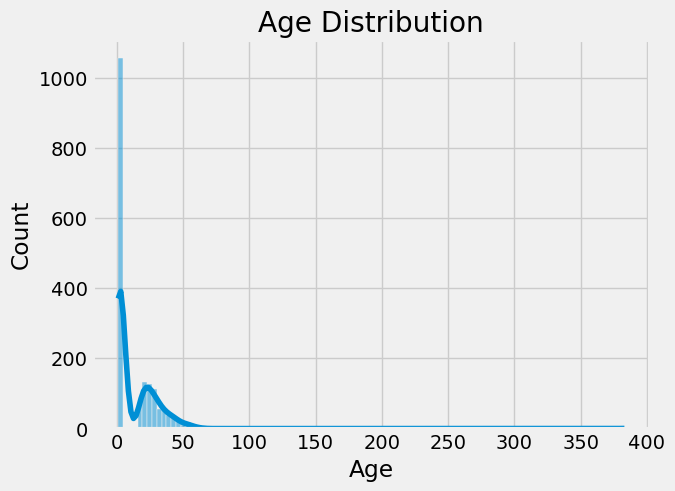

In [289]:
# Age distribution
sns.histplot(data_encoded['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

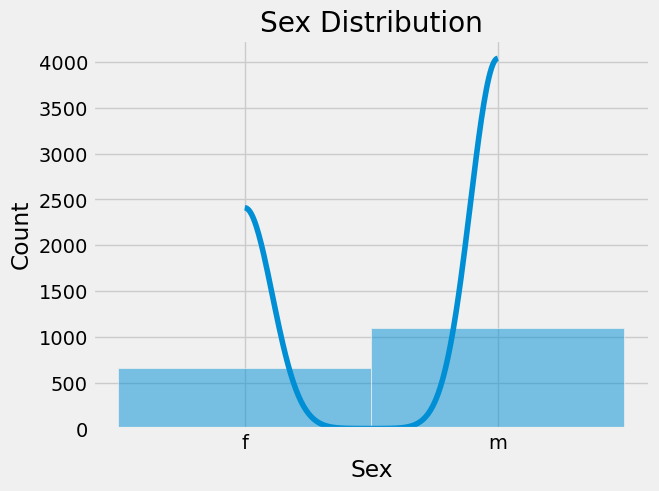

In [290]:
sns.histplot(data['Sex'], kde=True)
plt.title('Sex Distribution')
plt.show()


In [292]:
data_encoded2

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  Ethnicity_Hispanic  \
0      0   0   0   0   0   0   1   1   0    1  ...                   0   
1      1   1   0   0   0   1   1   0   0    0  ...                   0   
2      1   0   0   0   0   0   1   1   0    1  ...                   0   
3      1   1   1   1   1   1   1   1   1    1  ...                   1   
4      1   1   0   1   1   1   1   1   1    1  ...                   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...                 ...   
1751   1   1   1   1   1   1   1   1   1    1  ...                   0   
1752   0   1   0   1   1   0   1   1   1    1  ...                   0   
1753   1   0   0   0   0   0   0   1   0    1  ...                   1   
1754   1   0   1   1   1   0   1   1   0    1  ...                   0   
1755   1   0   1   1   1   0   1   1   1    1  ...                   0   

      Ethnicity_LatiNO  Ethnicity_Middle Eastern  Ethnicity_Mixed  \
0                    0                         1                0   
1                    0                         0                0   
2                    0                         1                0   
3                    0                         0                0   
4                    0                         0                0   
...                ...                       ...              ...   
1751                 0                         0                0   
1752                 0                         0                0   
1753                 0                         0                0   
1754                 0                         0                0   
1755                 0                         0                0   

      Ethnicity_Native Indian  Ethnicity_Pasifika  Ethnicity_South Asian  \
0                           0                   0                      0   
1                           0                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   
...                       ...                 ...                    ...   
1751                        0                   1                      0   
1752                        0                   0                      0   
1753                        0                   0                      0   
1754                        0                   0                      0   
1755                        0                   0                      0   

      Ethnicity_Turkish  Ethnicity_White-European  Ethnicity_others  
0                     0                         0                 0  
1                     0                         1                 0  
2                     0                         0                 0  
3                     0                         0                 0  
4                     0                         1                 0  
...                 ...                       ...               ...  
1751                  0                         0                 0  
1752                  0                         1                 0  
1753                  0                         0                 0  
1754                  0                         1                 0  
1755                  0                         1                 0  

[1756 rows x 28 columns]

In [294]:
#Prediction Model (NB)
# Prepare the data for modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

X = data_encoded2.drop(columns=['Class/ASD Traits'])
#y = data_encoded2['Class/ASD Traits'].apply(lambda x: 1 if x == 'Yes' else 0)
y = data_encoded2['Class/ASD Traits']

# Split the data into training and testing sets
#smote = SMOTE(random_state=42)
#X_train_res, y_train_res = smote.fit_resample(X_train,y_train) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Initialize the Naive Bayes classifier (Gaussian Naive Bayes in this case)
naive_bayes_classifier = GaussianNB()

# Train the Naive Bayes classifier
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive Bayes classifier: {accuracy}")

#confusion matrix
# Assuming y_true and y_pred are your true and predicted labels
#labels = [0, 1]  # Specify all possible class labels
#confusion = confusion_matrix(y_test, y_pred, labels=labels)
confusion = confusion_matrix(y_test, y_pred)

print(confusion)
precision_score(y_test, y_pred)






Accuracy of the Naive Bayes classifier: 0.8603448275862069
[[233  64]
 [ 17 266]]


0.806060606060606

In [297]:
import seaborn as sns

sns.boxplot(x='Class/ASD Traits', y='Age', data=data_encoded2)
plt.show()

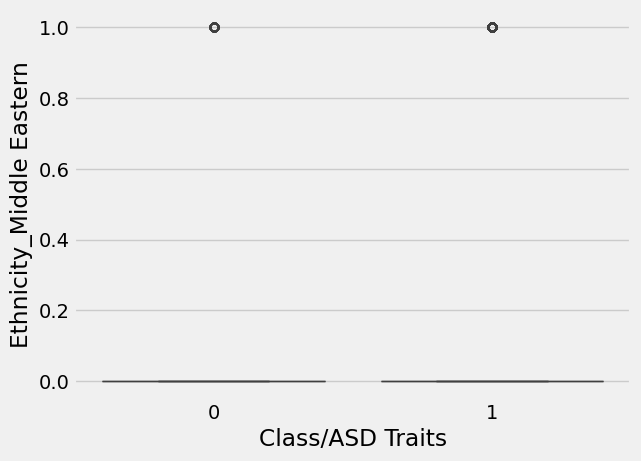

In [299]:
import seaborn as sns

sns.boxplot(x='Class/ASD Traits', y='Ethnicity_Middle Eastern', data=data_encoded2)
plt.show()

In [301]:
#Prediction Model (Random Forest )
# Prepare the data for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_


# Define the number of folds for cross-validation
#num_folds = 5
#kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
#cross_val_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
#print("Cross-Validation Scores:")
#for fold, score in enumerate(cross_val_scores, 1):
#    print(f"Fold {fold}: {score}")

# Calculate and print the average cross-validation score
#average_score = cross_val_scores.mean()
#print(f"Average Cross-Validation Score: {average_score}")


# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_model.predict(X_test)

# Evaluate the model
accuracy = rf_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
#confusion matrix
# Assuming y_true and y_pred are your true and predicted labels
#labels = [0, 1]  # Specify all possible class labels
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
precision_score(y_test, y_pred)
#print(classification_report(y_test, y_pred))
#print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")




Accuracy: 1.0
[[233  64]
 [ 17 266]]


0.806060606060606

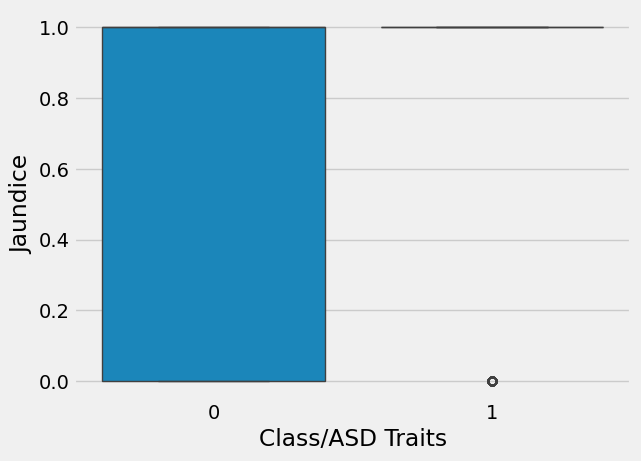

NameError: name 'Ethnicity_Hispanic' is not defined

In [302]:
import seaborn as sns

sns.boxplot(x='Class/ASD Traits', y='Jaundice', data=data_encoded2)
plt.show()
Ethnicity_Hispanic

In [ ]:
import seaborn as sns

sns.boxplot(x='Class/ASD Traits', y='Ethnicity_Middle Eastern', data=data_encoded2)
plt.show()

In [ ]:
#Prediction Model (KNN)
# Prepare the data for modeling
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
precision_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Confusion Matrix:
[[183   2]
 [  2 165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       185
           1       0.99      0.99      0.99       167

    accuracy                           0.99       352
   macro avg       0.99      0.99      0.99       352
weighted avg       0.99      0.99      0.99       352

Accuracy: 0.99


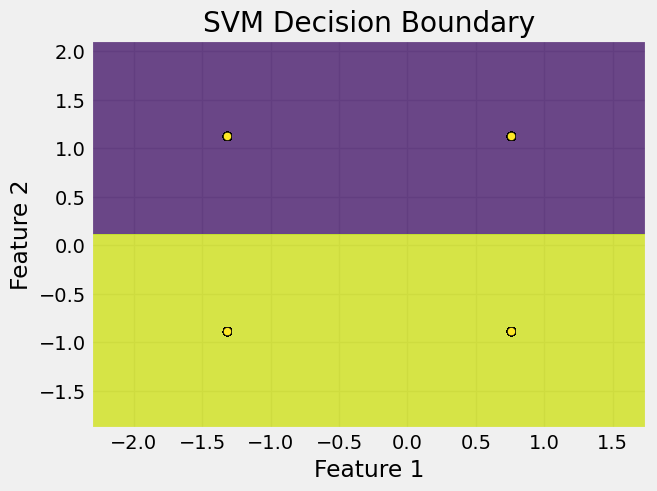

In [306]:
#Prediction Model (SVM)

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load a dataset (for example, the Iris dataset)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  
   
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # You can choose other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# استخدام الميزتين فقط من مجموعة بيانات Iris كمثال
X_train = X_train[:, :2]  # احتفظ بأول ميزتين فقط
X_test = X_test[:, :2]     # احتفظ بأول ميزتين فقط

# إعادة تدريب النموذج
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


# Optional: Visualize the results (for 2D data)
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# If you want to visualize the decision boundaries, use the first two features
plot_decision_boundaries(X_train[:, :2], y_train, svm_model)




In [307]:
import pandas as pd

# تقسيم البيانات إلى فئات عمرية
bins = [0, 5, 12, 18, 30, 50]  # حدود الفئات العمرية
labels = ['0-5', '6-12', '13-18', '19-30', '31-50']  # تسميات الفئات
data_encoded2['Age_Group'] = pd.cut(data_encoded2['Age'], bins=bins, labels=labels)

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


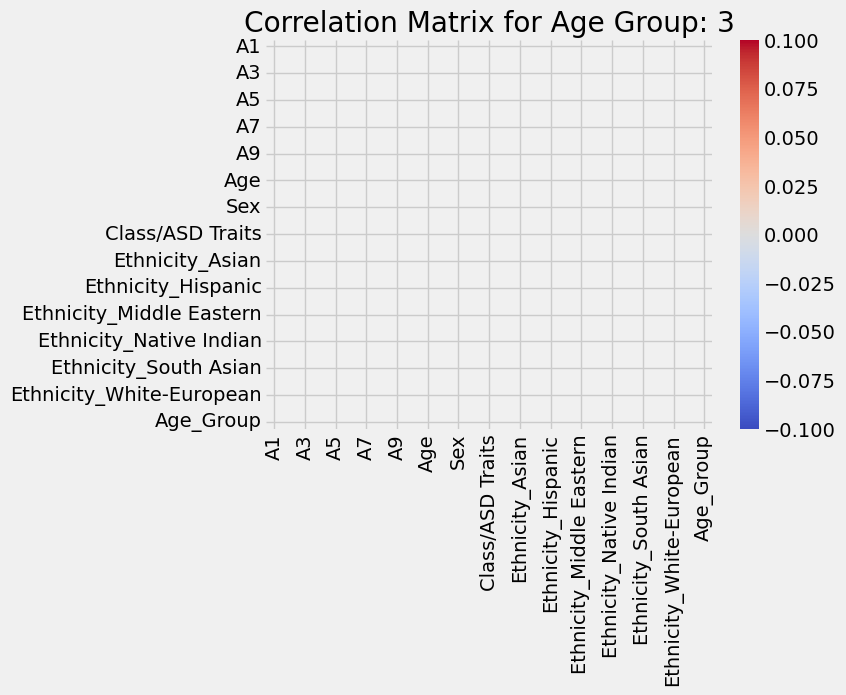

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


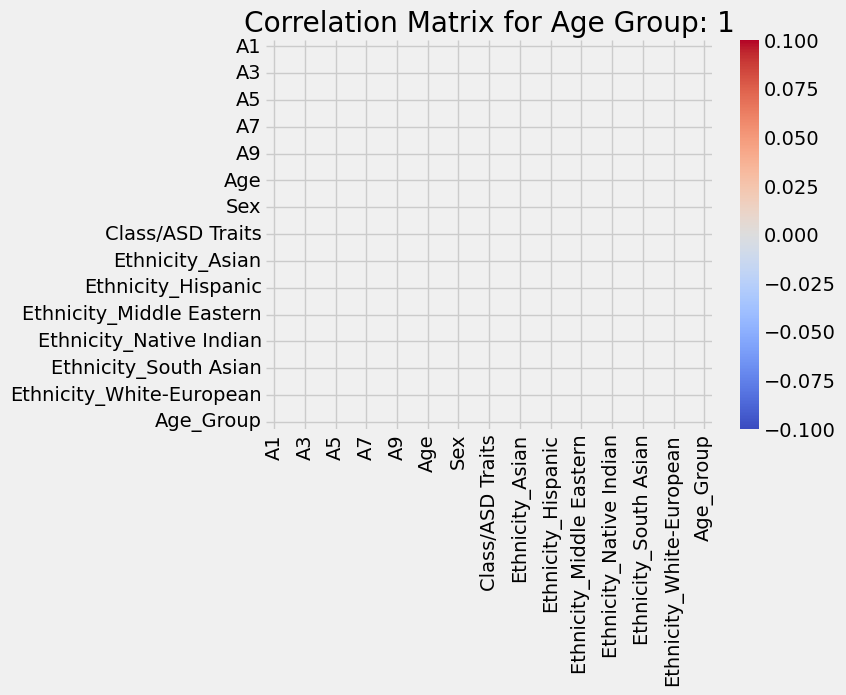

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


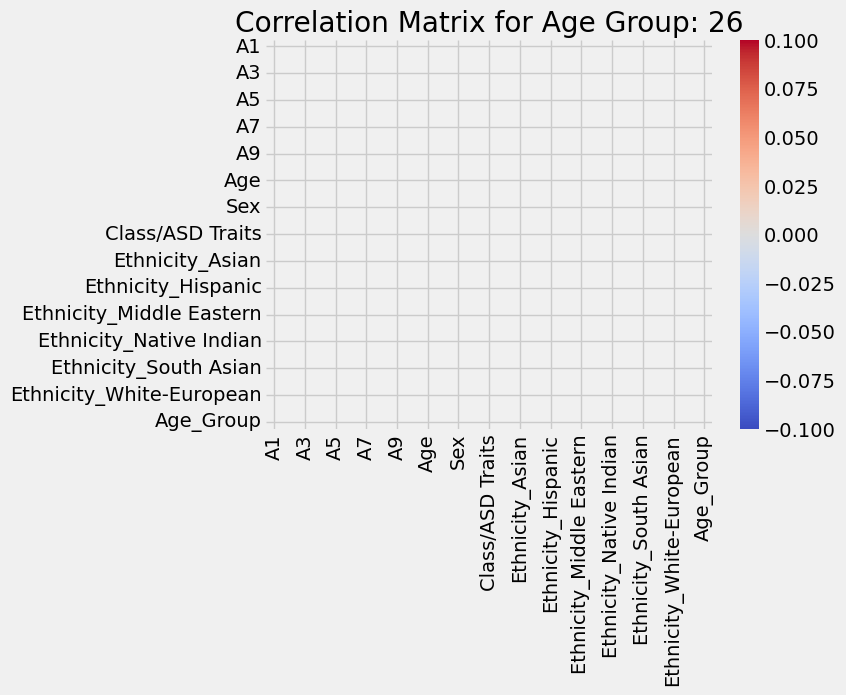

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


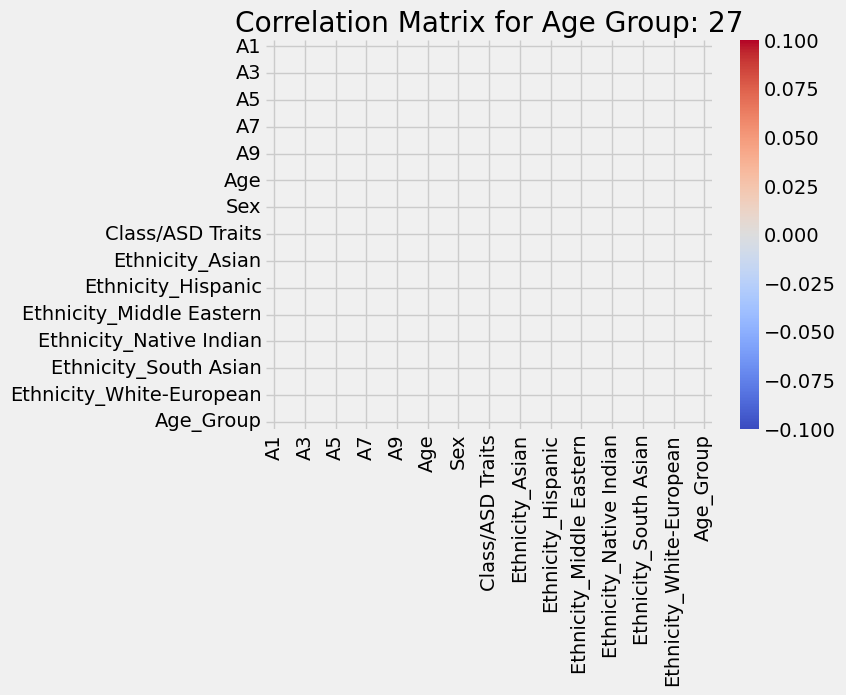

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


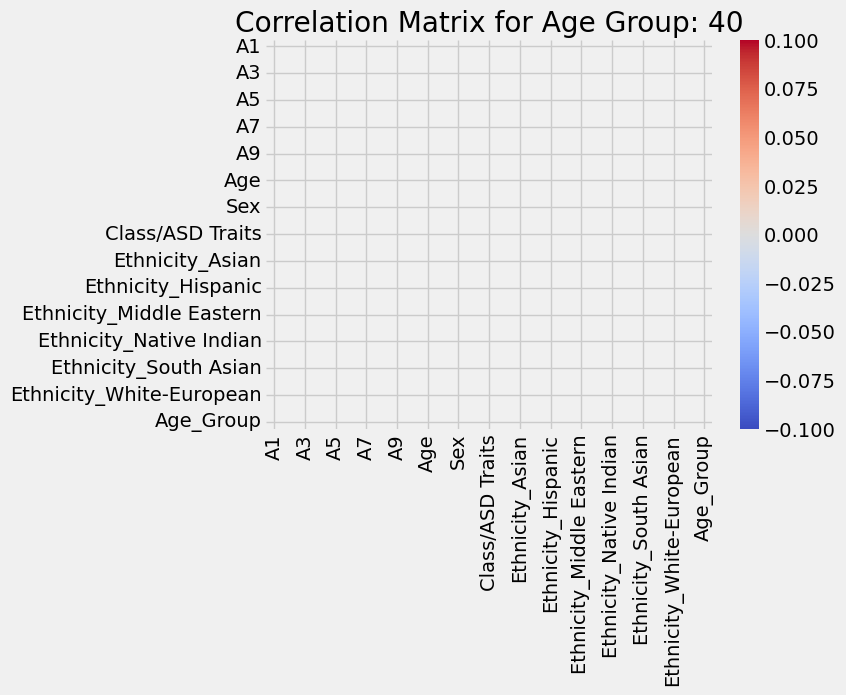

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


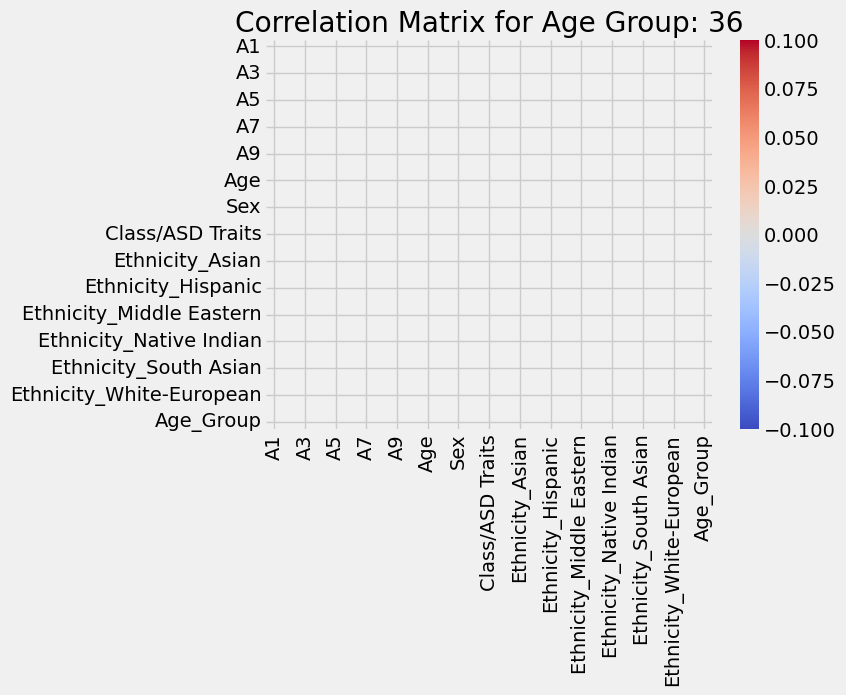

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


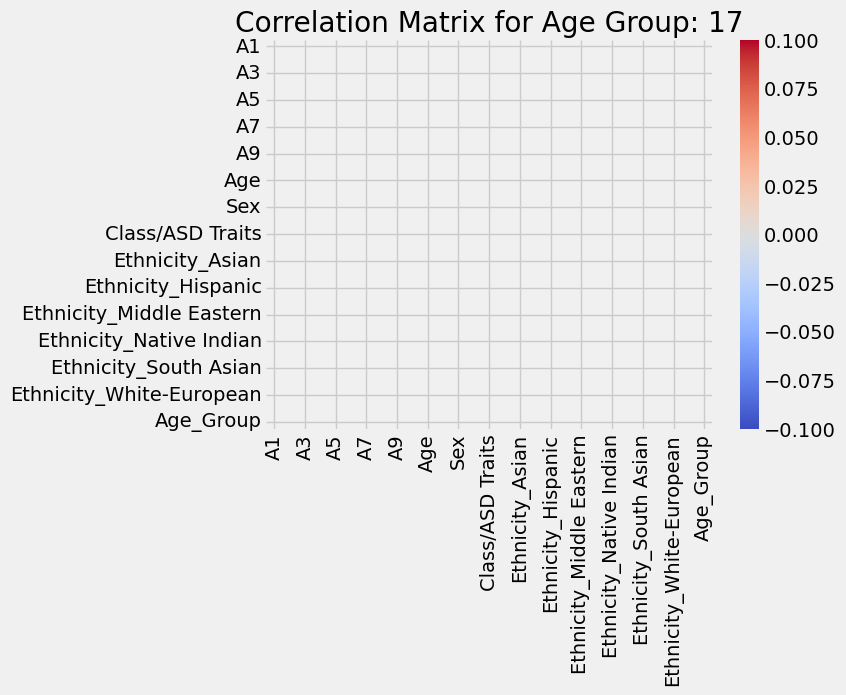

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


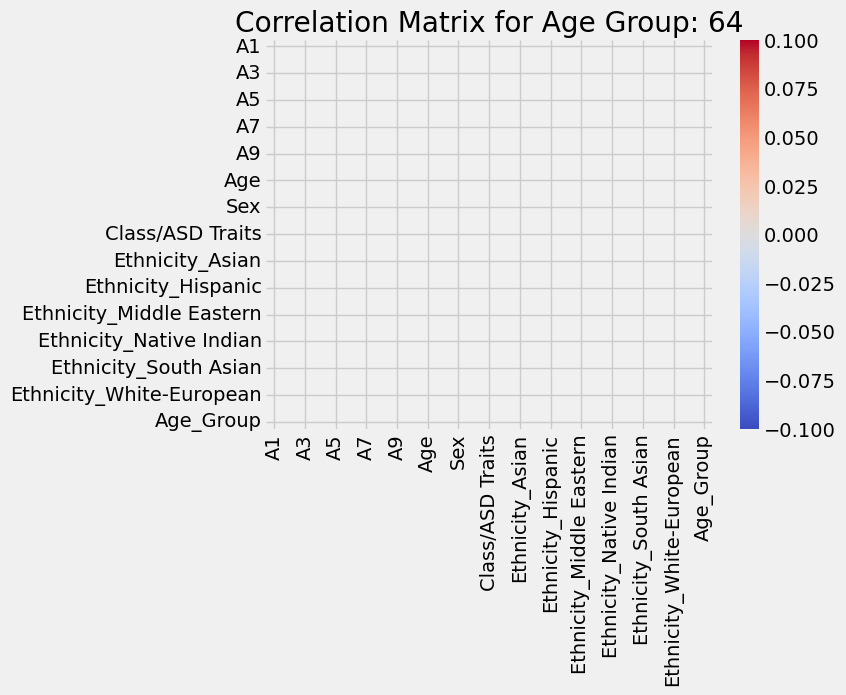

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


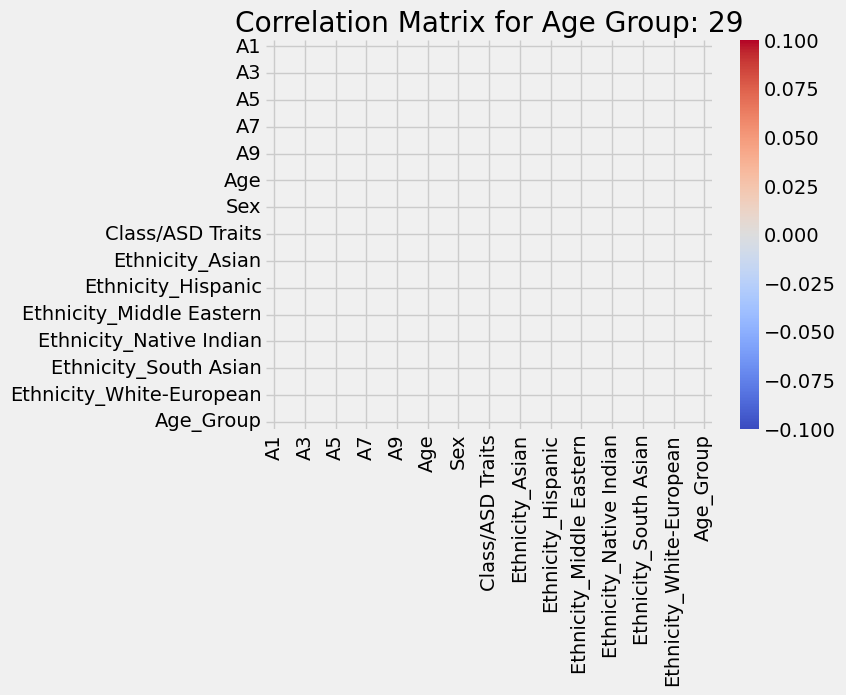

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


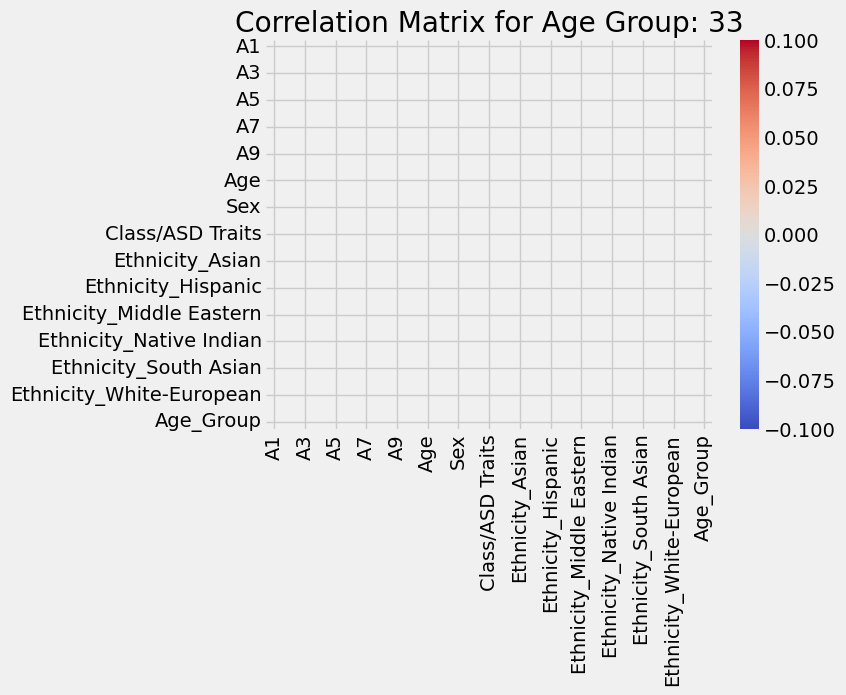

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


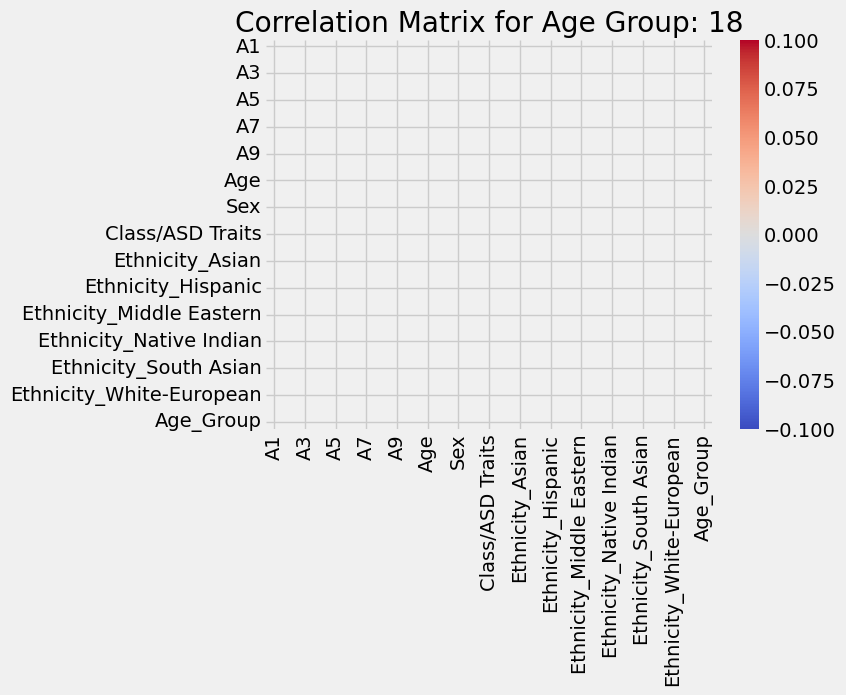

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


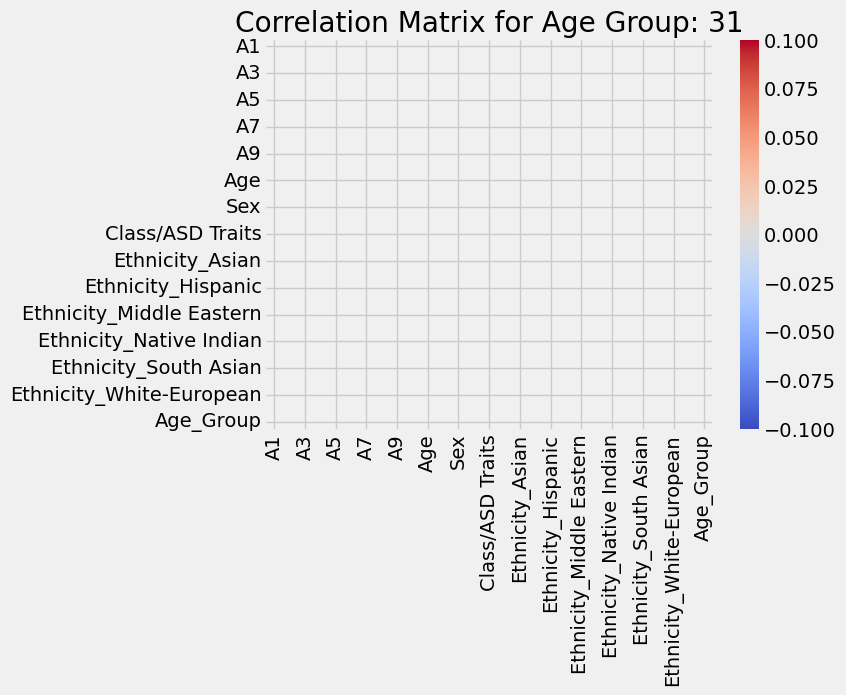

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


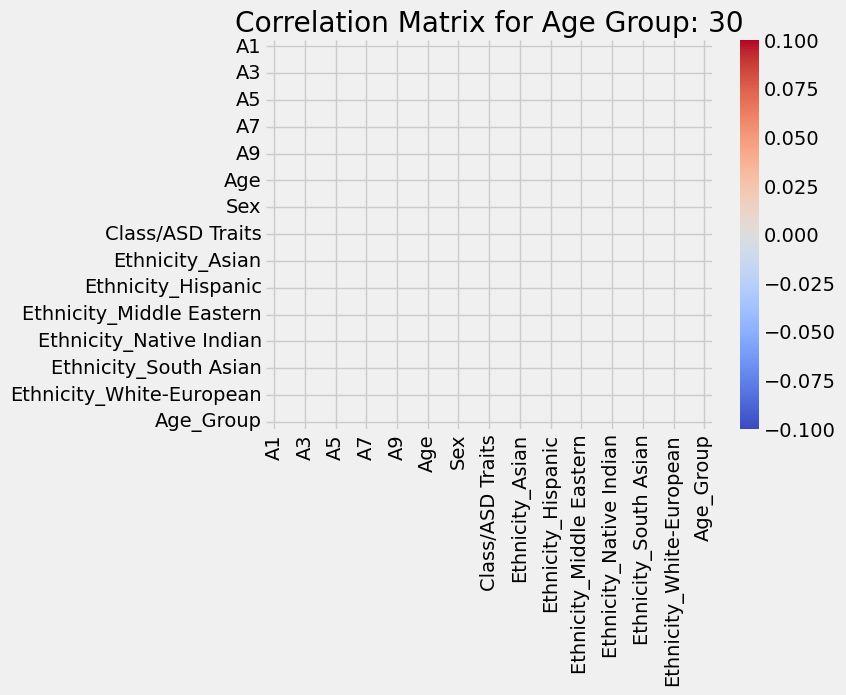

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


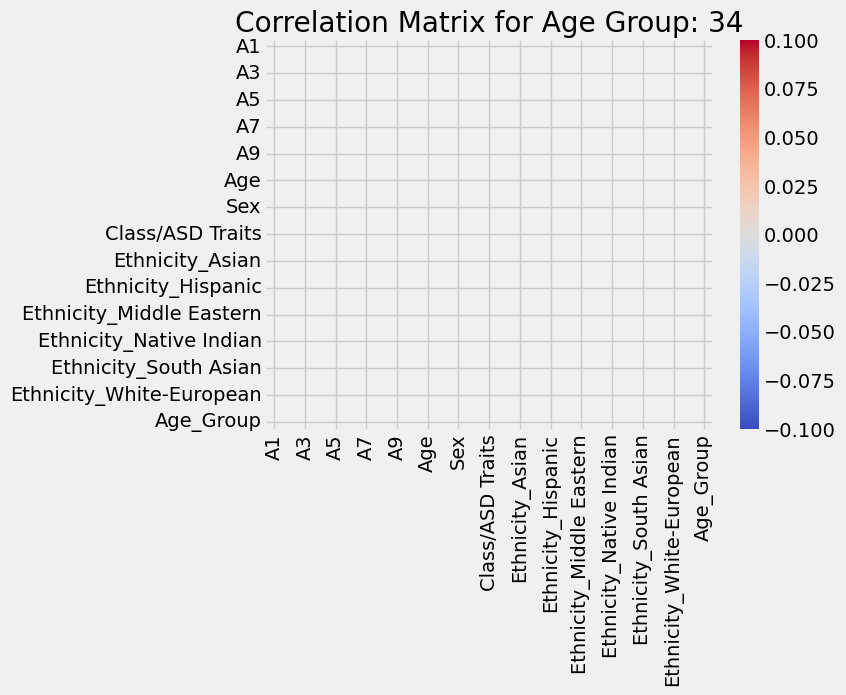

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


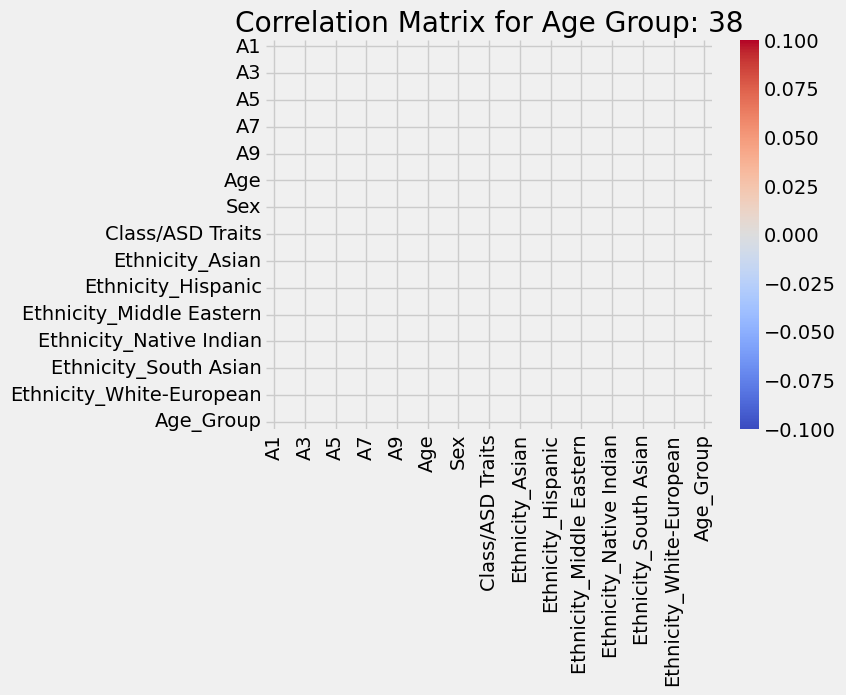

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


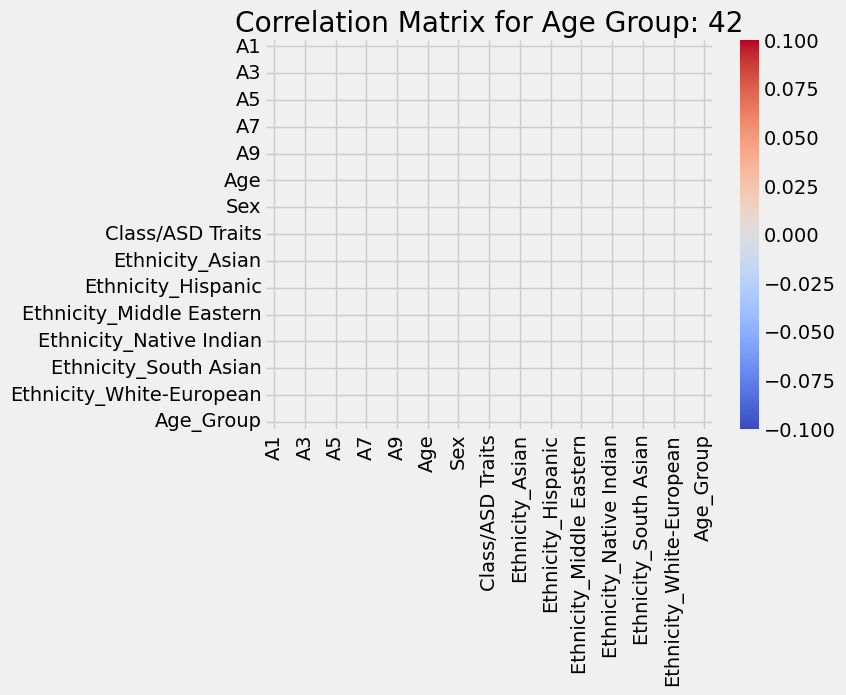

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


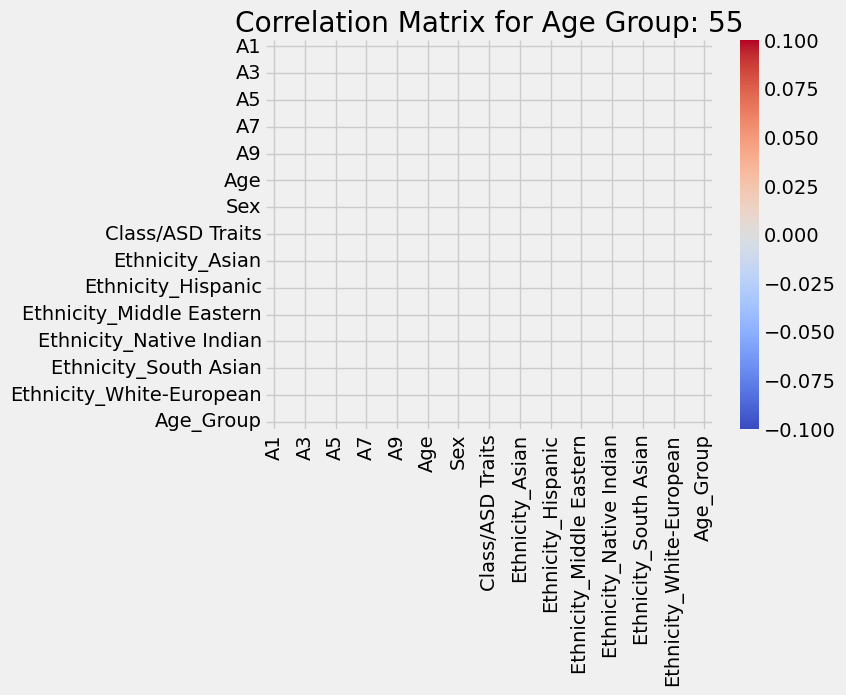

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


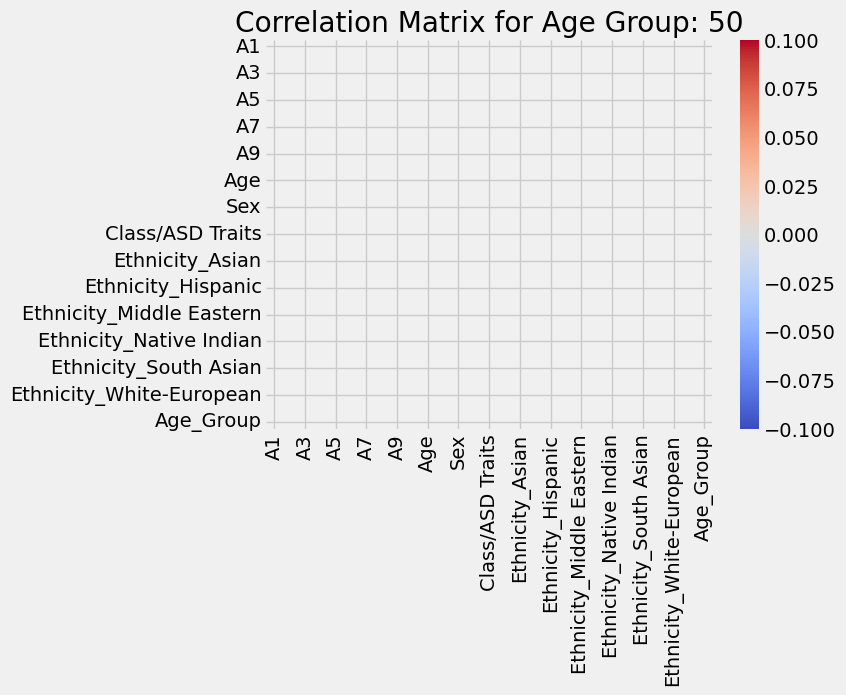

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


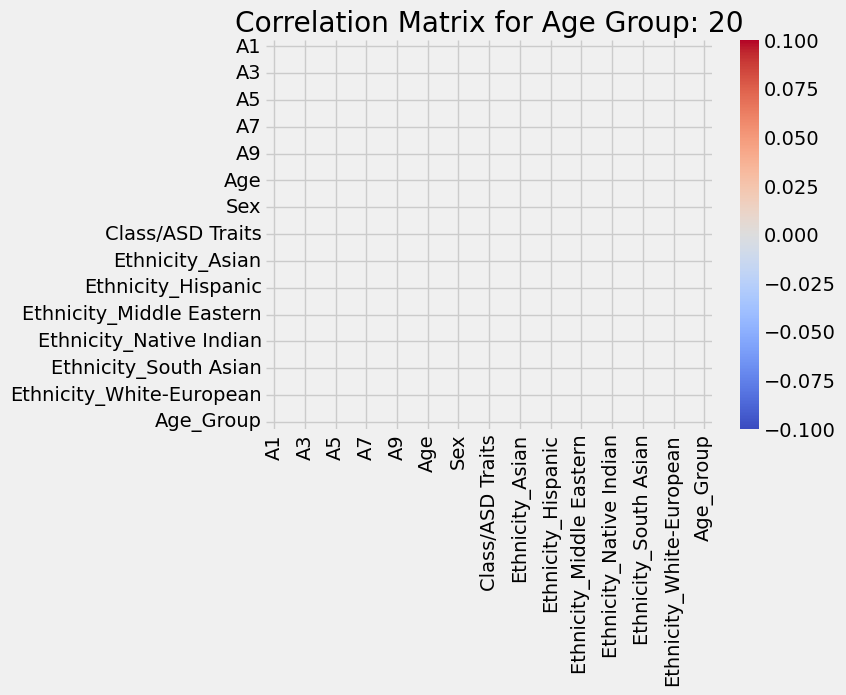

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


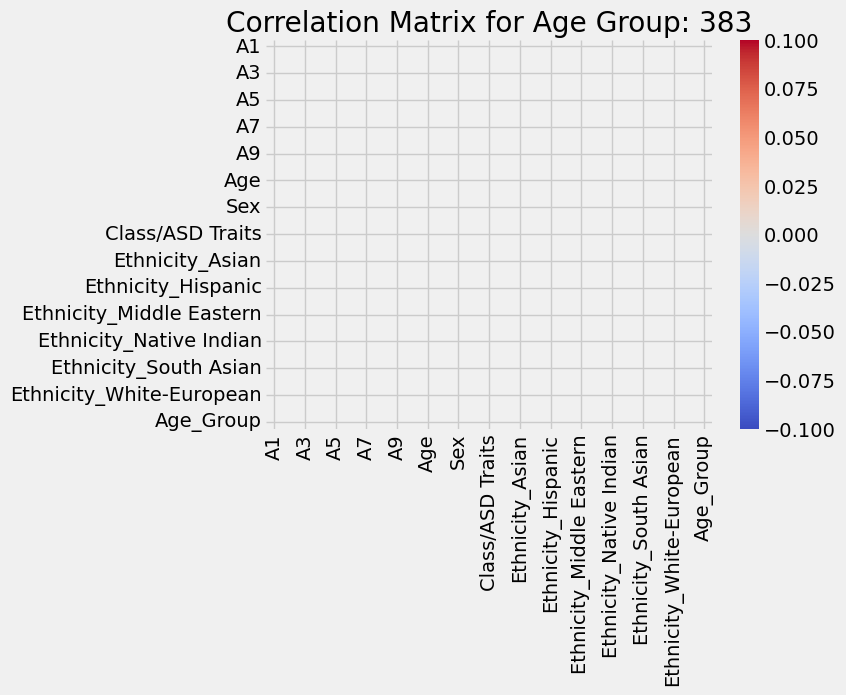

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


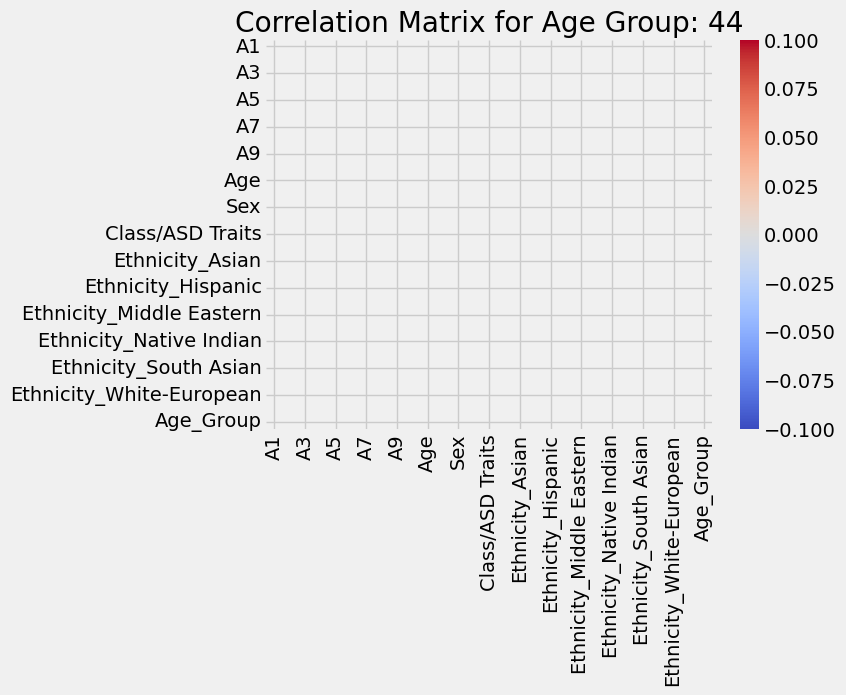

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


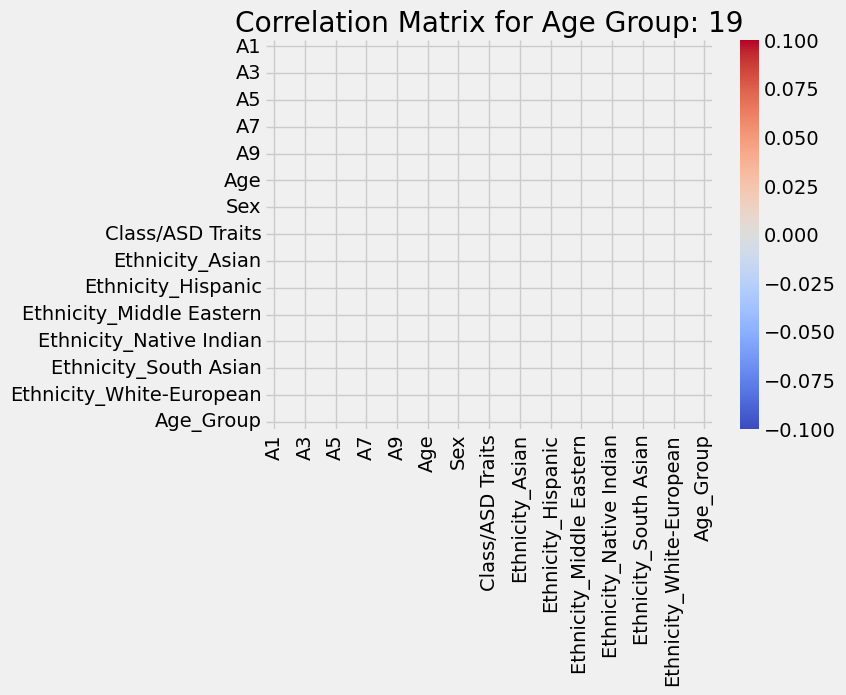

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


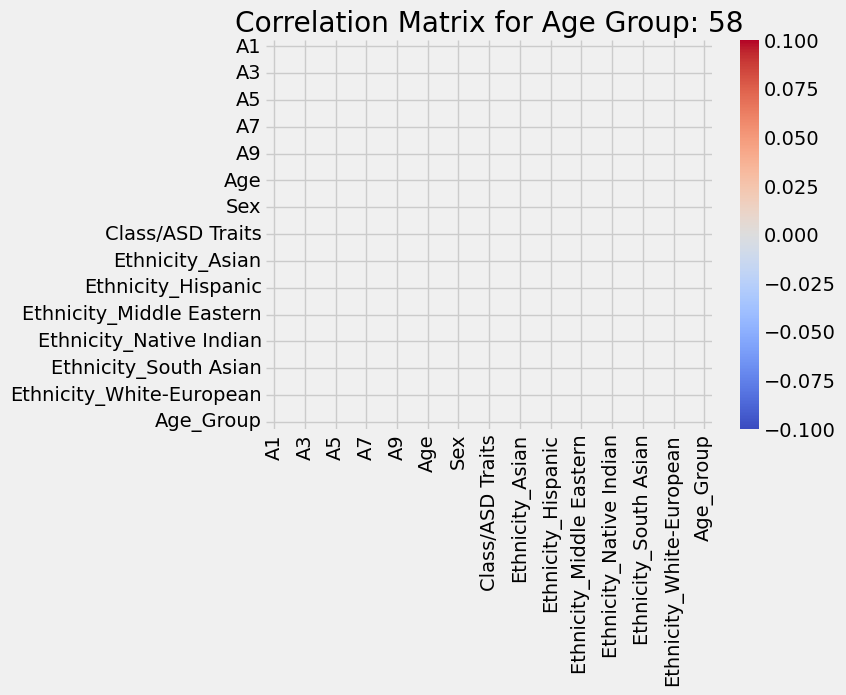

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


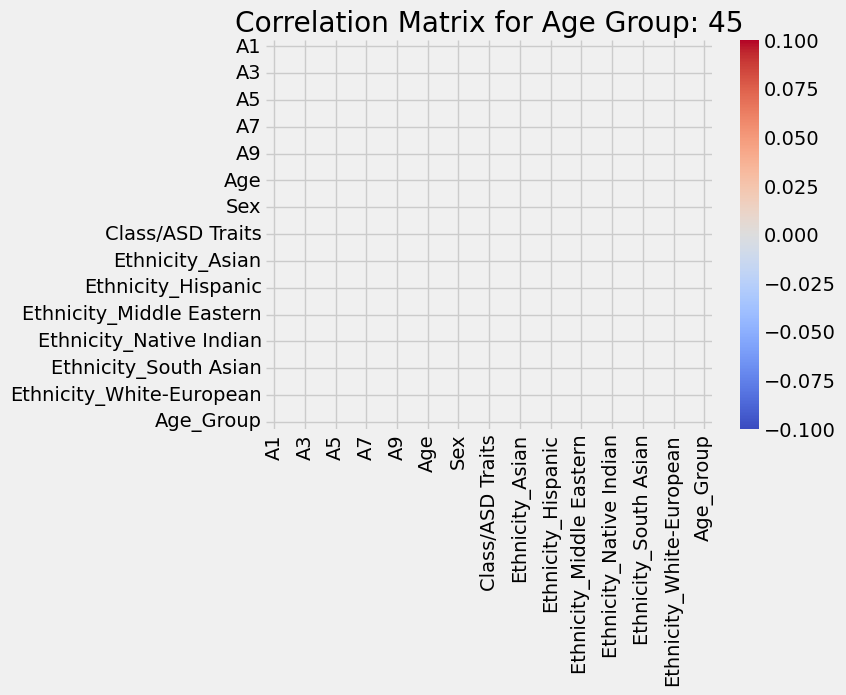

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


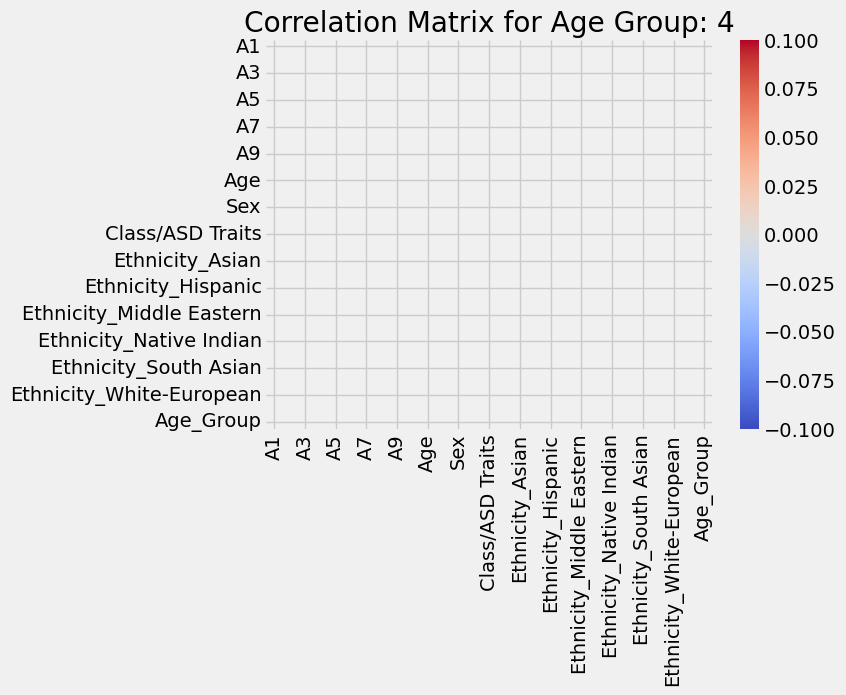

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


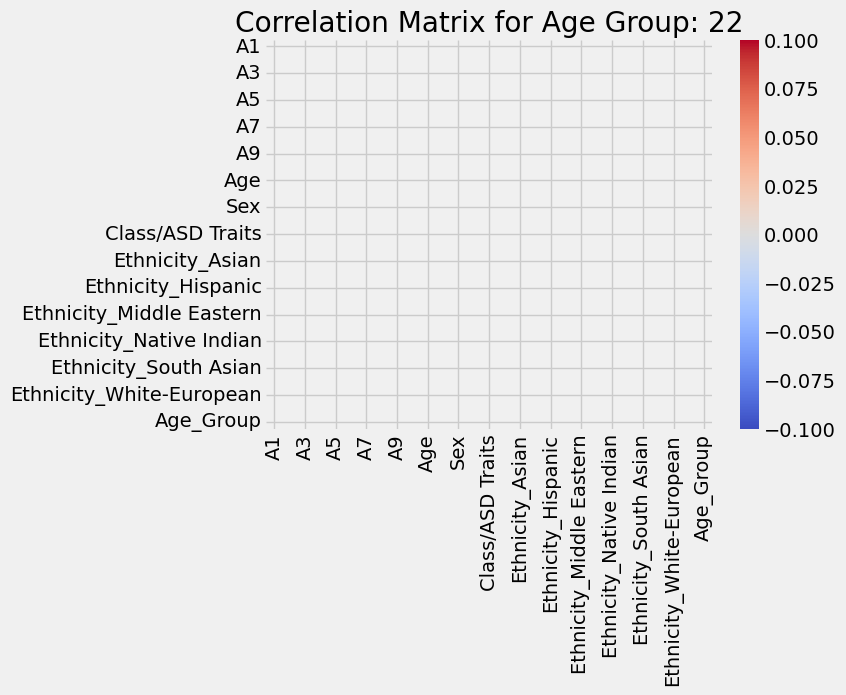

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


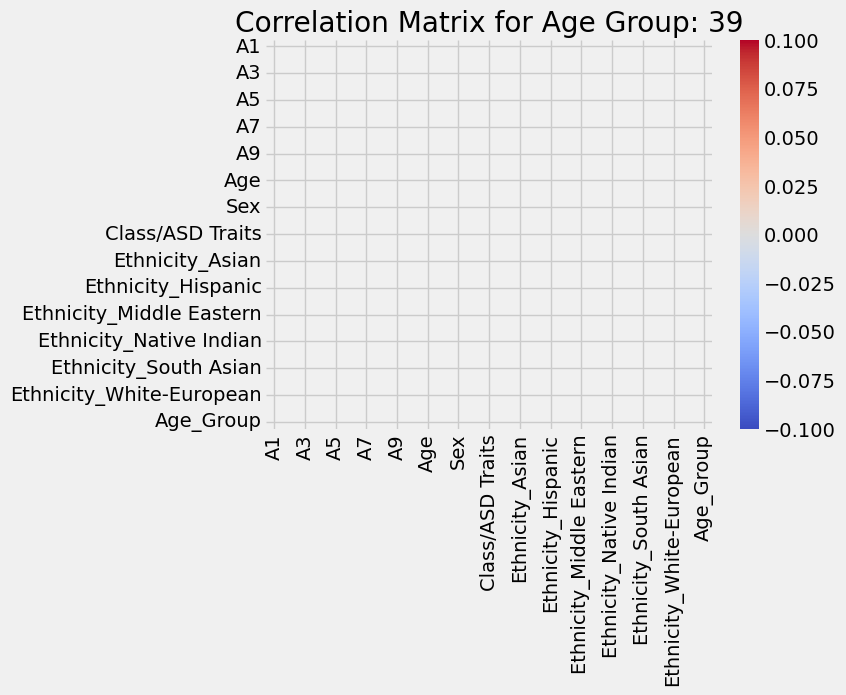

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


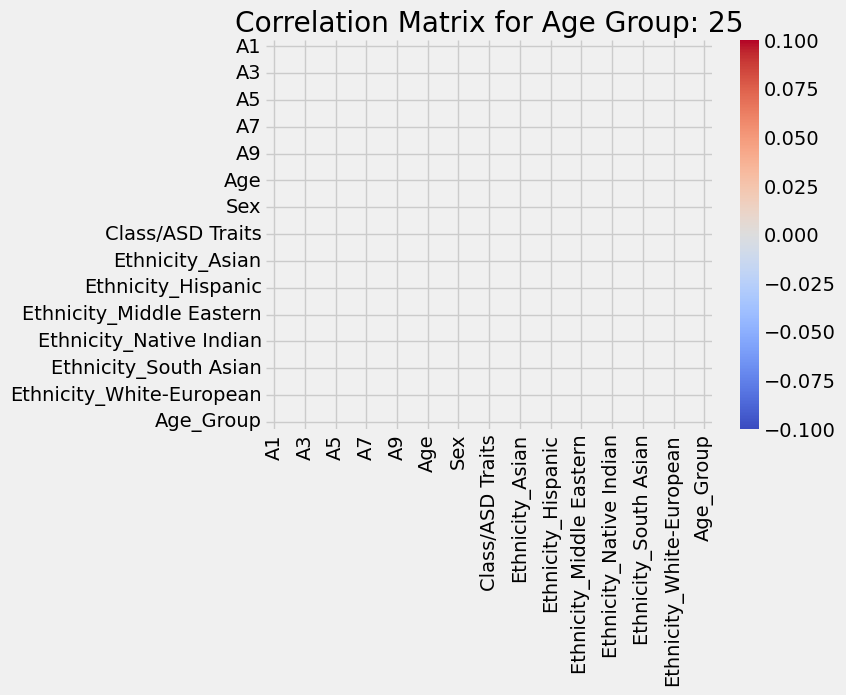

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


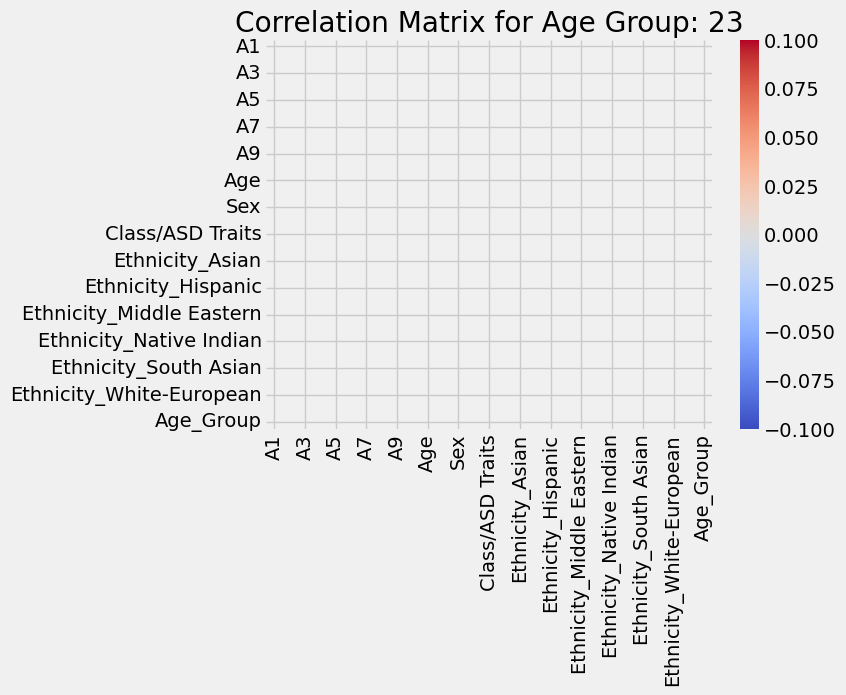

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


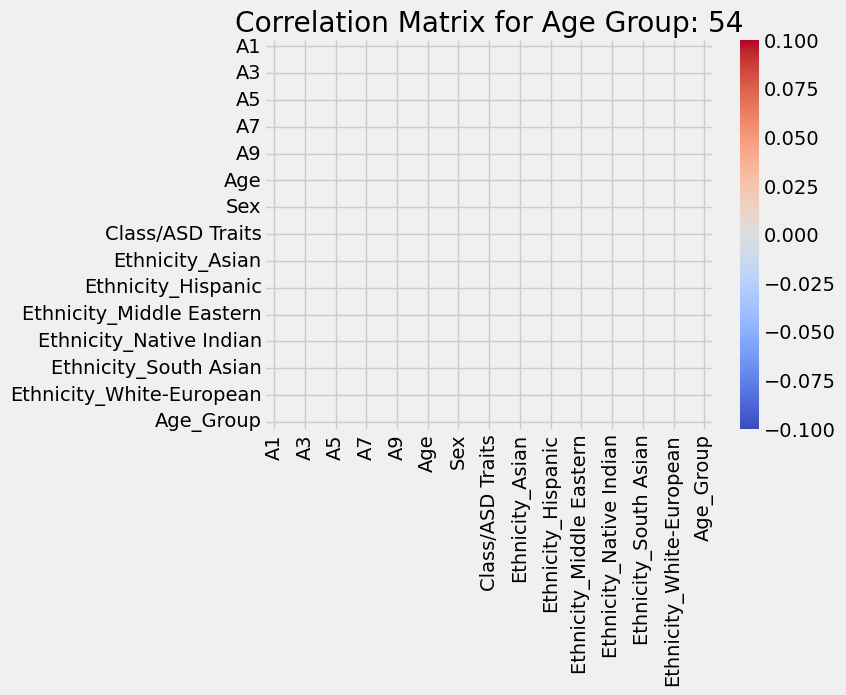

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


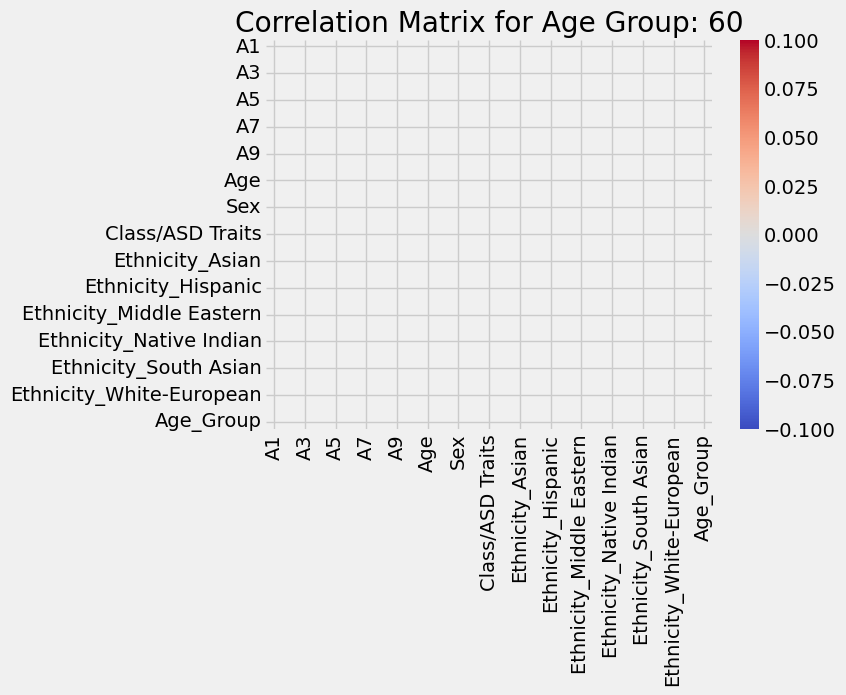

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


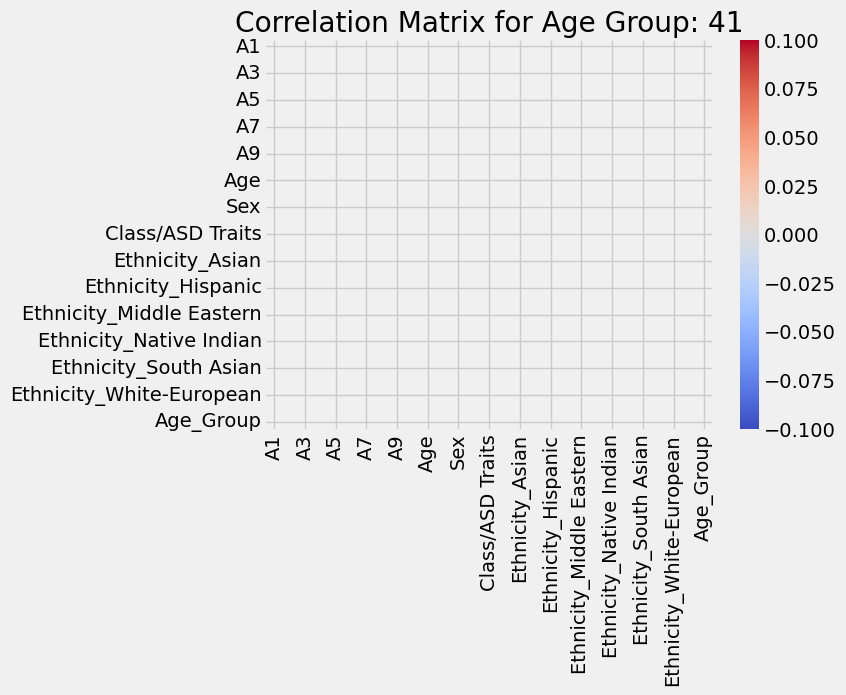

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


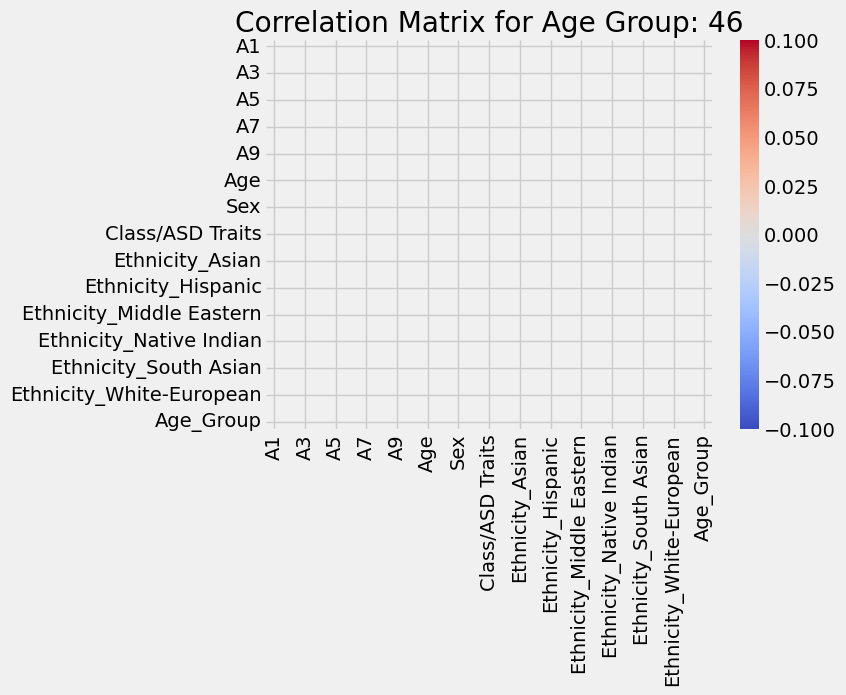

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


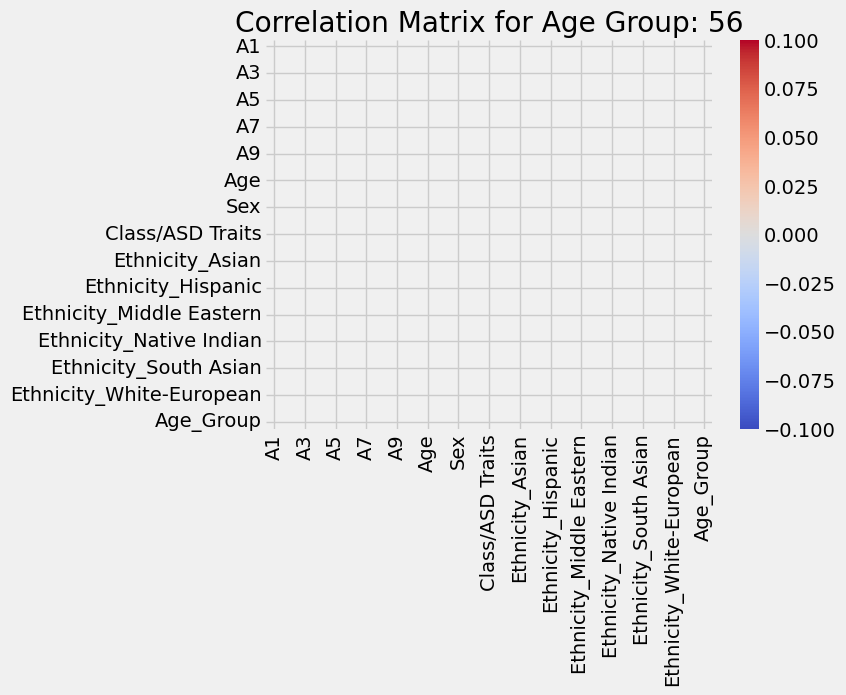

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


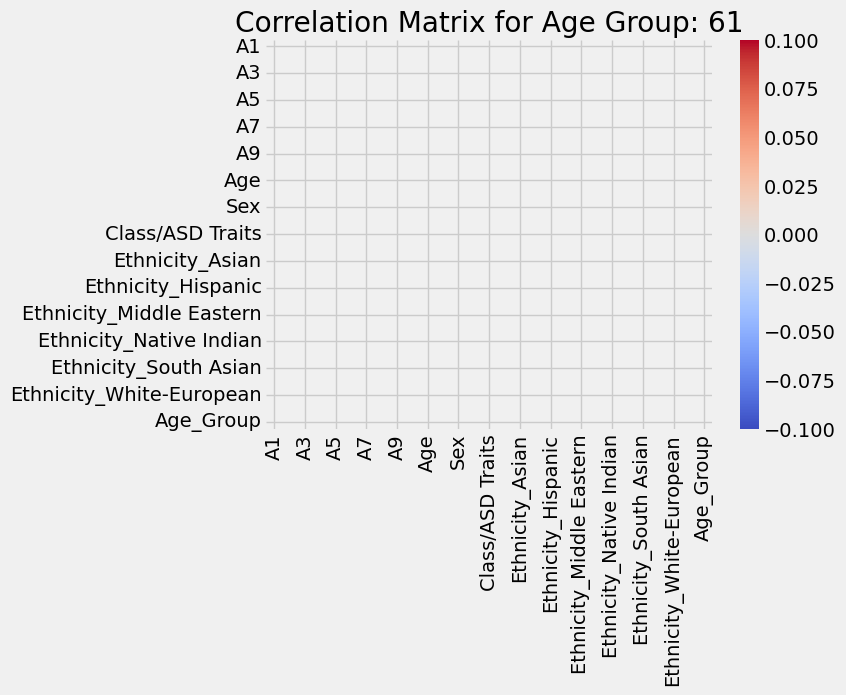

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


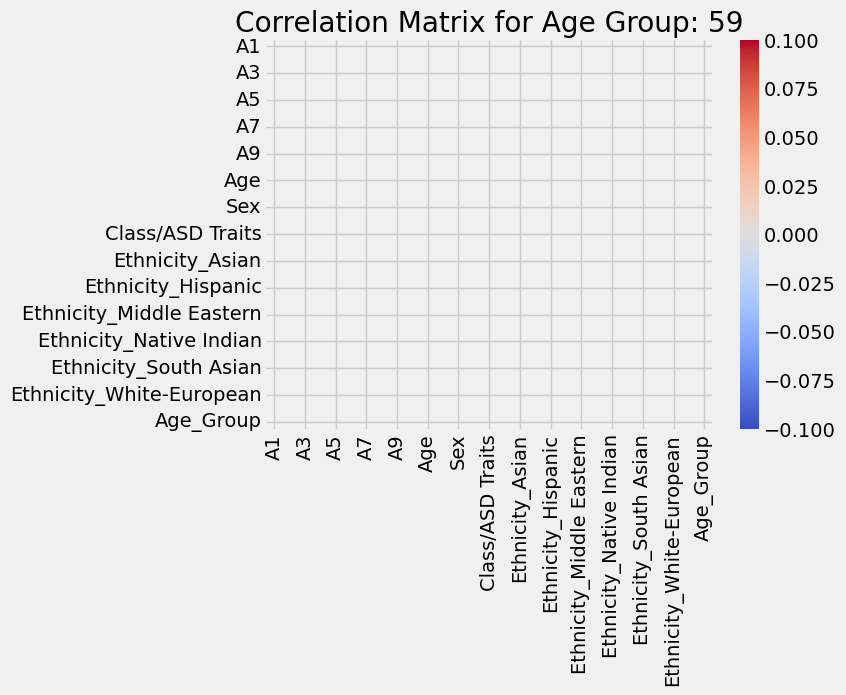

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


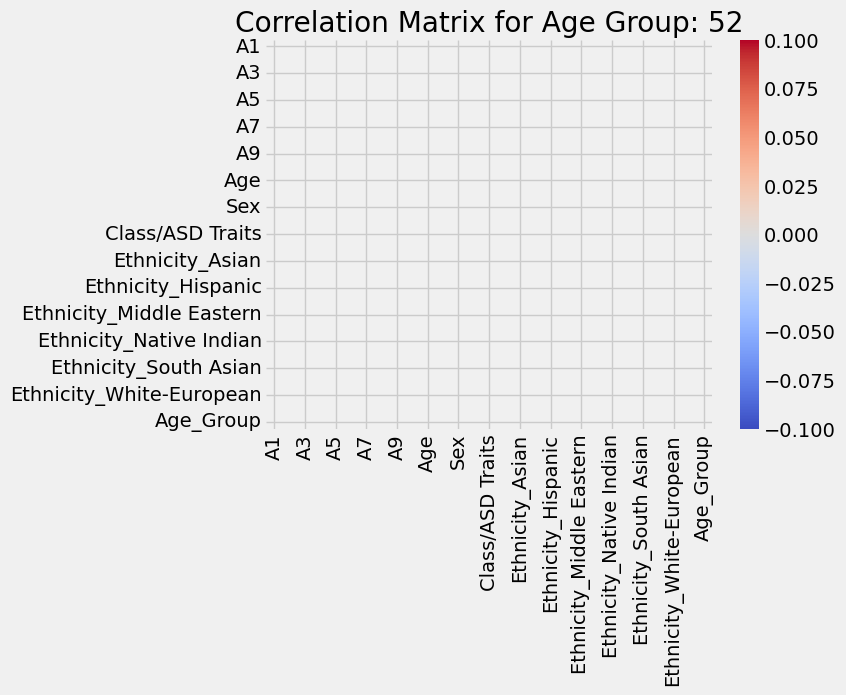

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


In [308]:
#تحليل العلاقة بين الميزات واحتمالية الإصابة باضطراب طيف التوحد 
#أ. تحليل الارتباط (Correlation Analysis)
import seaborn as sns
import matplotlib.pyplot as plt

for age_group in data_encoded2['Age'].unique():
    subset = data_encoded2[data_encoded2['Age_Group'] == age_group]
    corr = subset.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for Age Group: {age_group}')
    plt.show()


In [309]:
from scipy.stats import f_oneway

for feature in data_encoded2.columns:
    if feature != 'Age_category' and feature != 'Class/ASD Traits':  # تجنب الأعمدة غير الرقمية
        groups = [data_encoded2[data_encoded2['Age_category'] == age_group][feature] for age_group in data_encoded2['Age_category'].unique()]
        f_stat, p_value = f_oneway(*groups)
        print(f"Feature: {feature}, F-statistic: {f_stat}, p-value: {p_value}")

Feature: A1, F-statistic: 12.375095780677912, p-value: 6.300983642177551e-10
Feature: A2, F-statistic: 2.0729777380754784, p-value: 0.08194039534202044
Feature: A3, F-statistic: 7.679601489517506, p-value: 3.927289312163943e-06
Feature: A4, F-statistic: 6.103596863475539, p-value: 7.085298505780146e-05
Feature: A5, F-statistic: 0.5657093941008582, p-value: 0.6875739890959833
Feature: A6, F-statistic: 40.09005336690537, p-value: 3.57691516492697e-32
Feature: A7, F-statistic: 24.900339604287595, p-value: 4.4353328659226315e-20
Feature: A8, F-statistic: 16.85565672820168, p-value: 1.4412653443602033e-13
Feature: A9, F-statistic: 15.81576539339862, p-value: 1.008436537904726e-12
Feature: A10, F-statistic: 1.7262171501336996, p-value: 0.14152988599755367
Feature: Age, F-statistic: 1390.5069800862757, p-value: 0.0
Feature: Qchat-10-Score, F-statistic: 4.521014142120186, p-value: 0.001233224743010909
Feature: Sex, F-statistic: 18.420568728360706, p-value: 7.729054657612131e-15
Feature: Jaundi

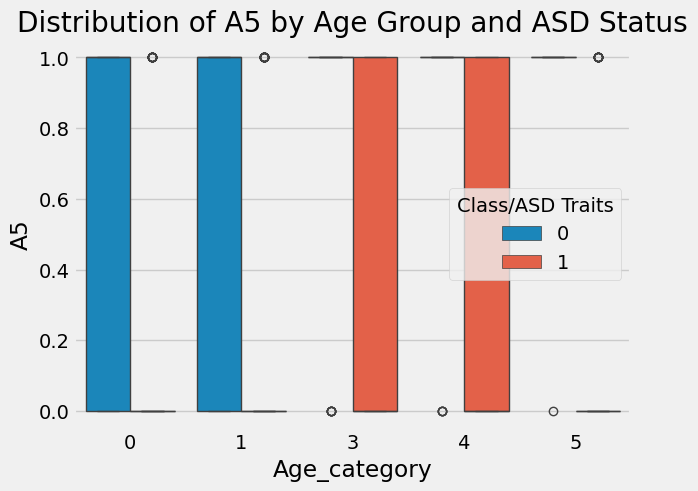

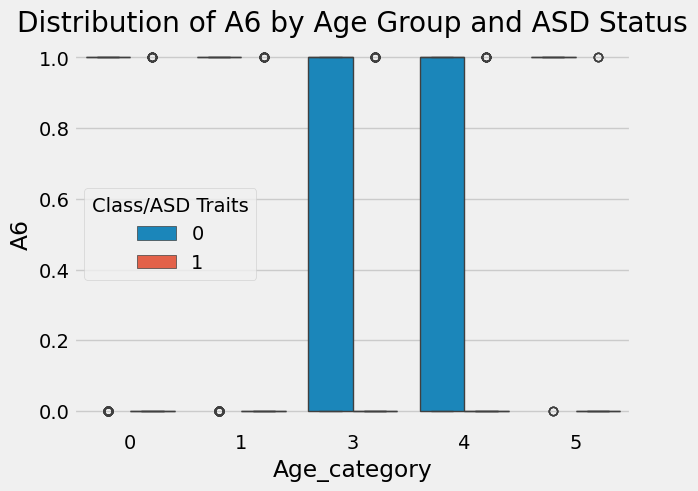

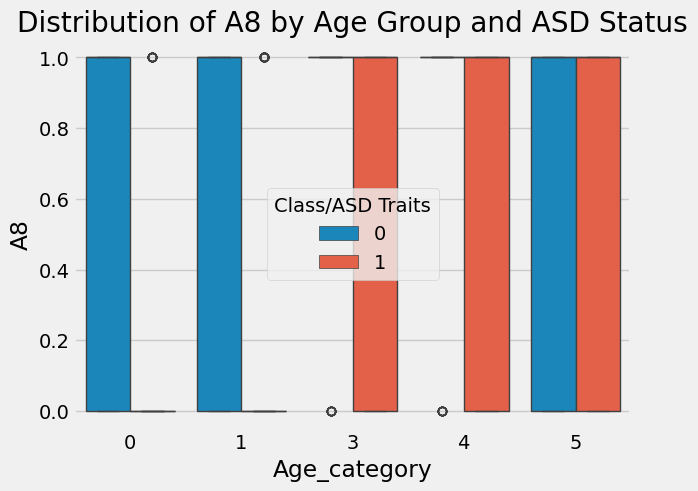

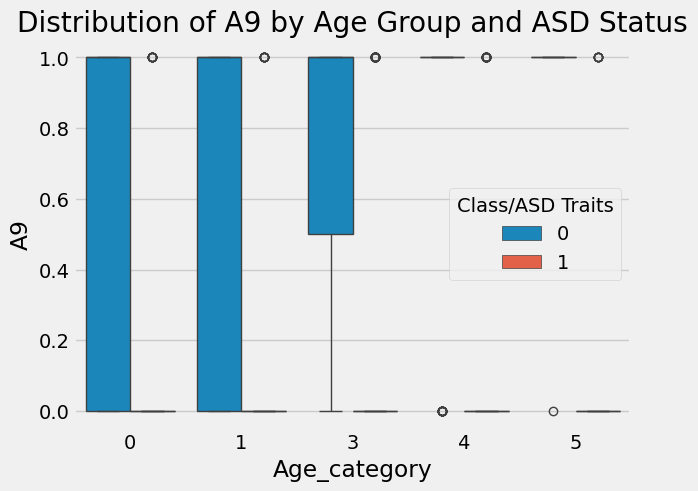

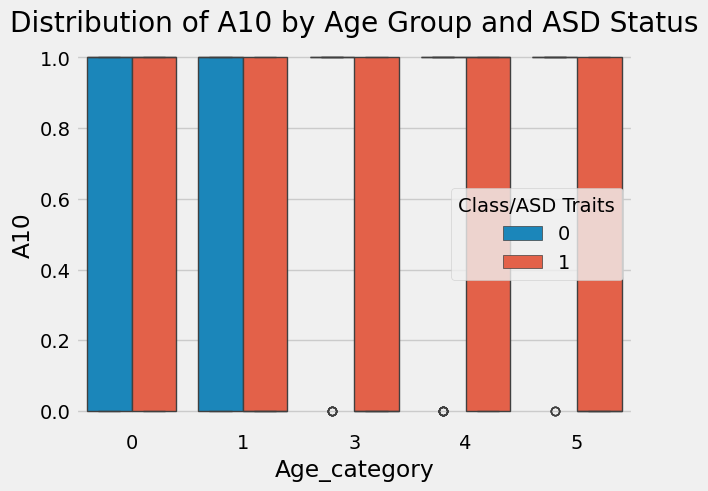

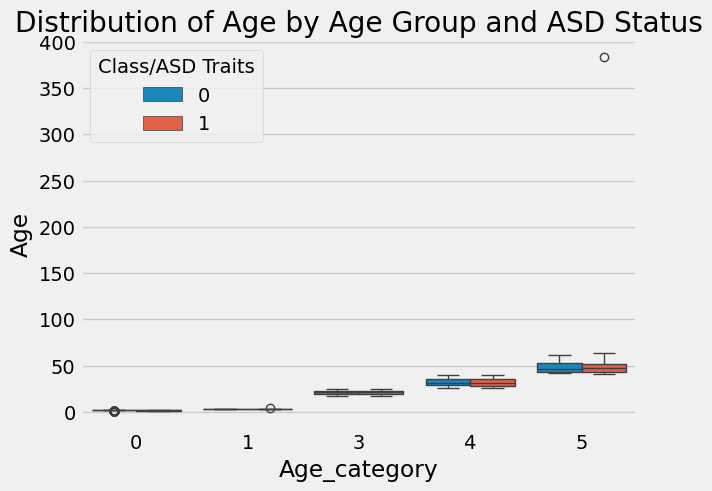

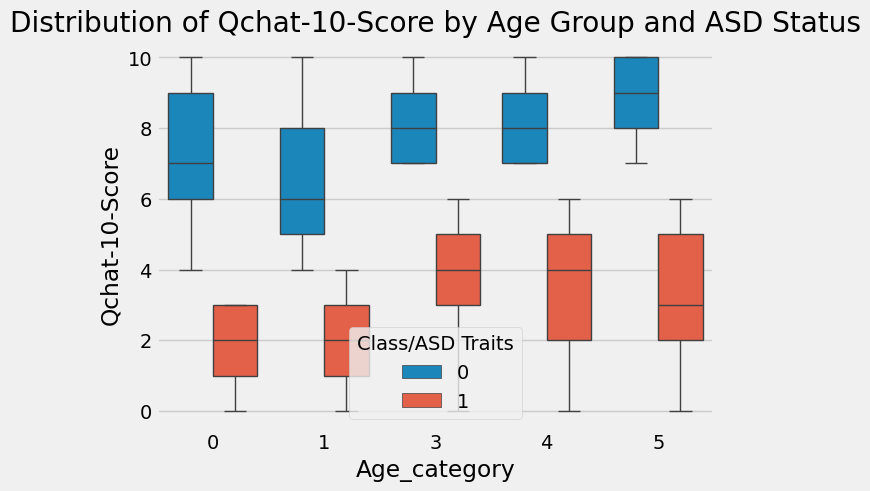

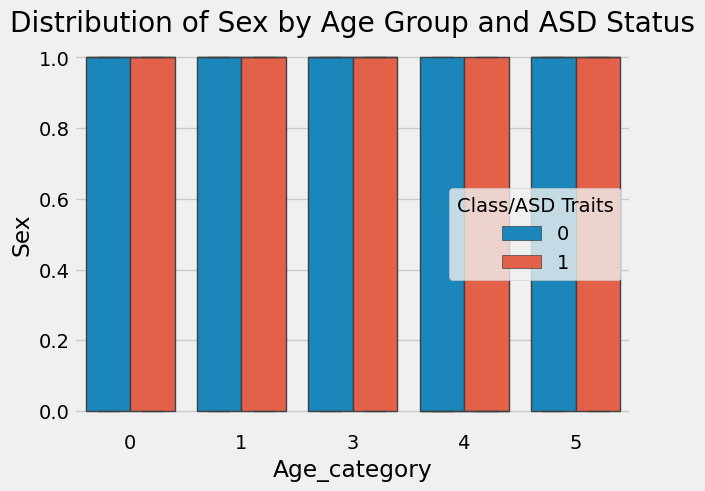

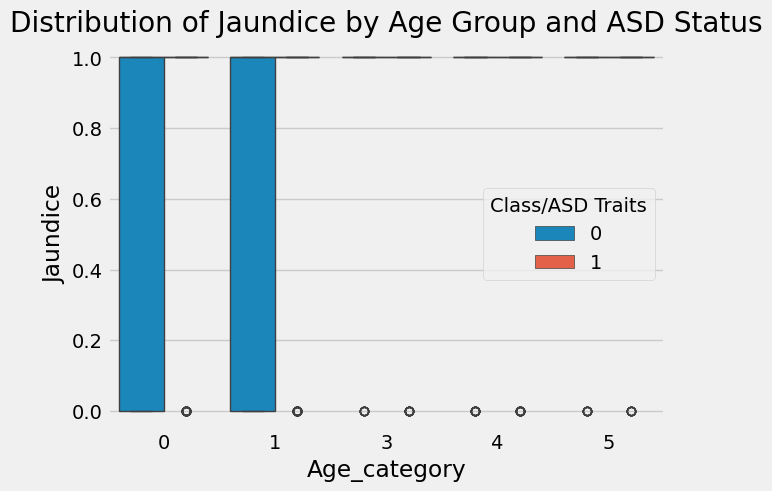

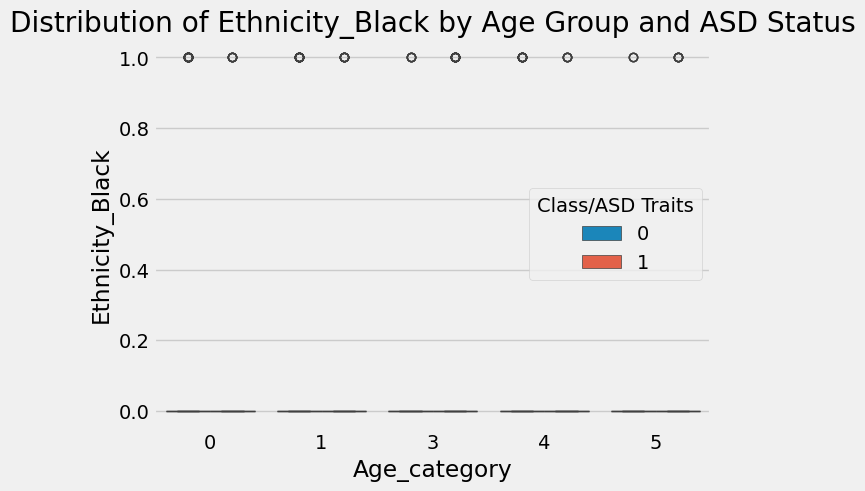

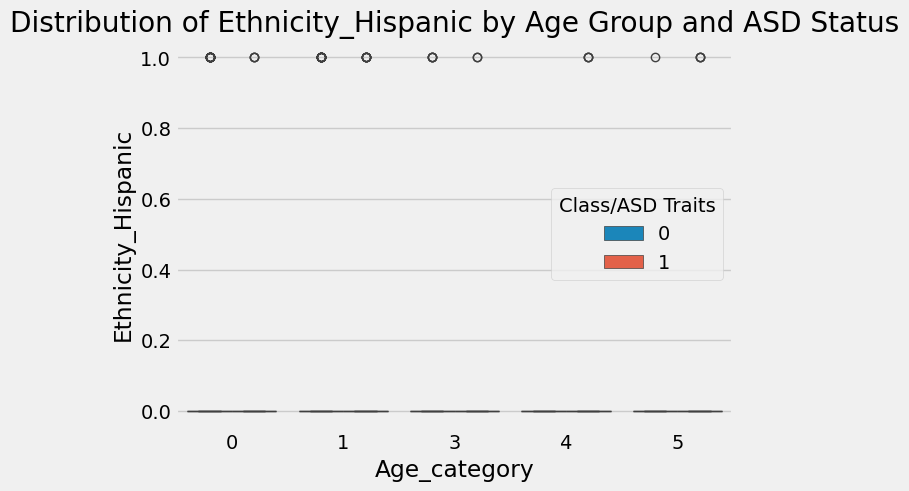

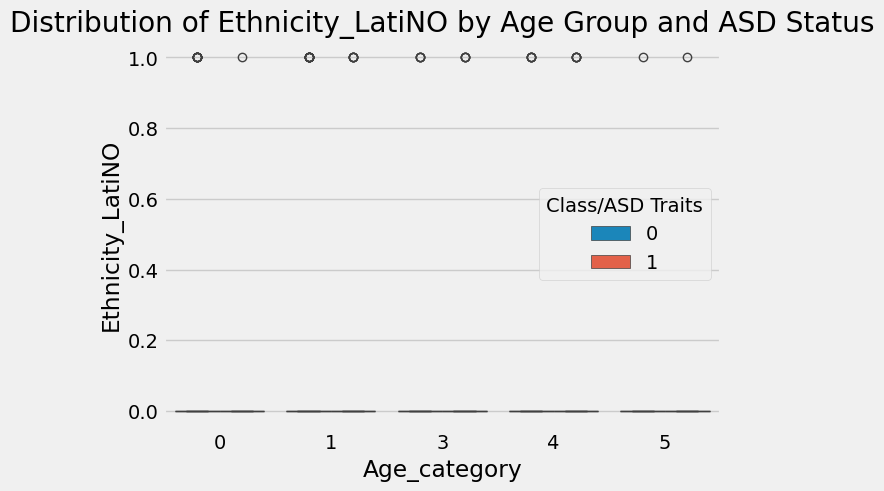

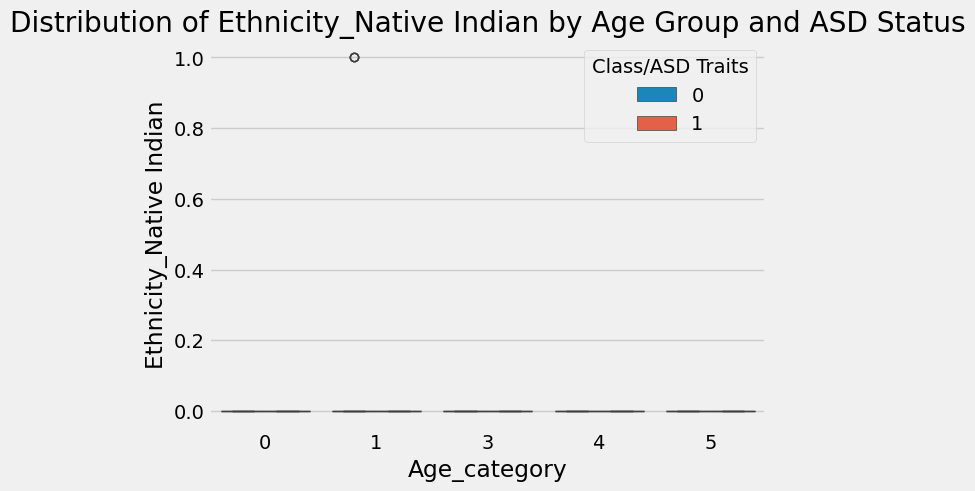

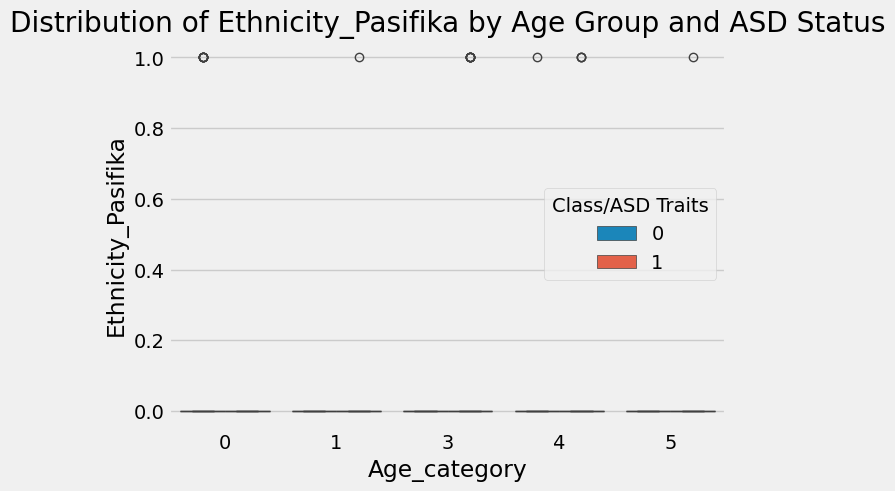

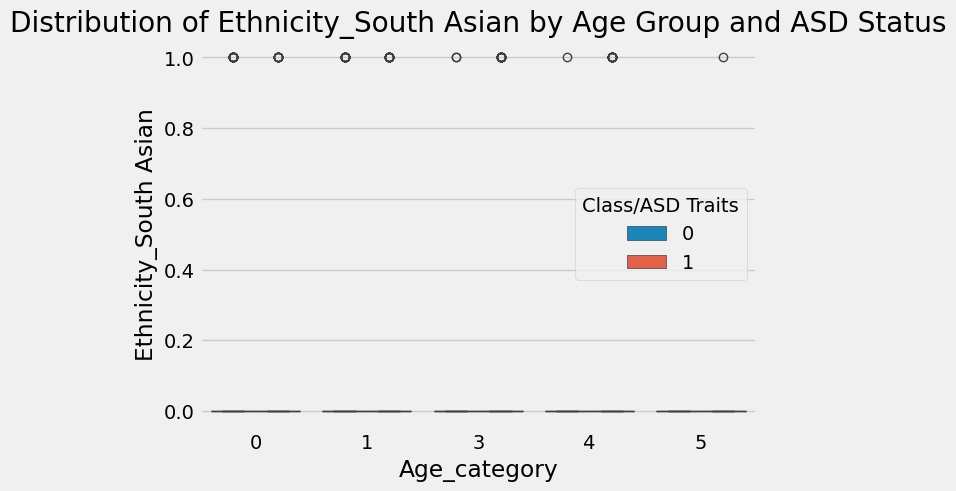

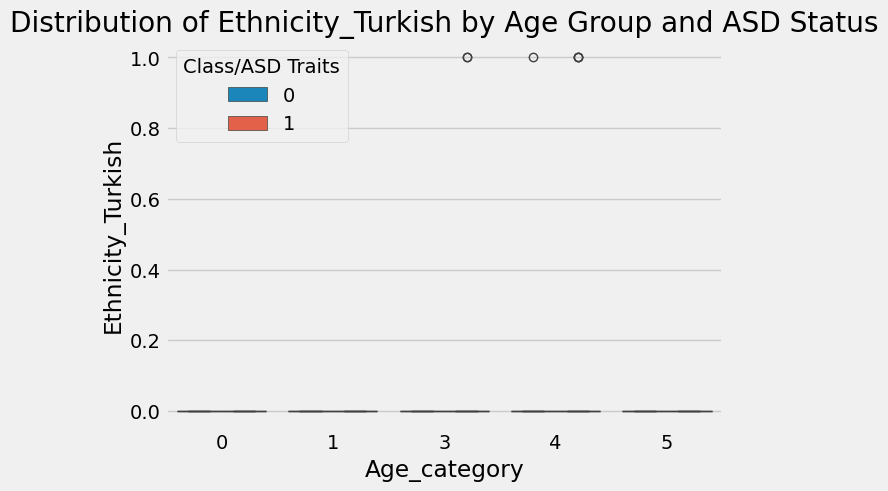

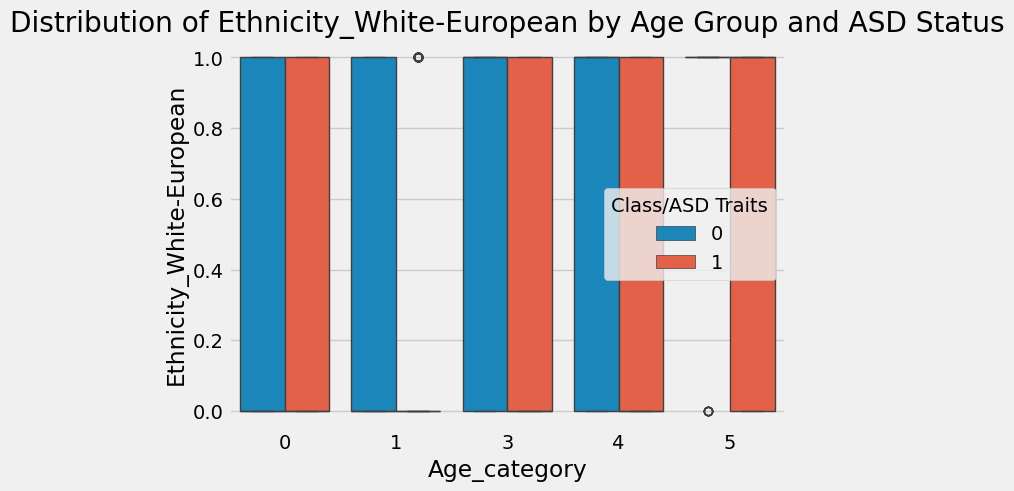

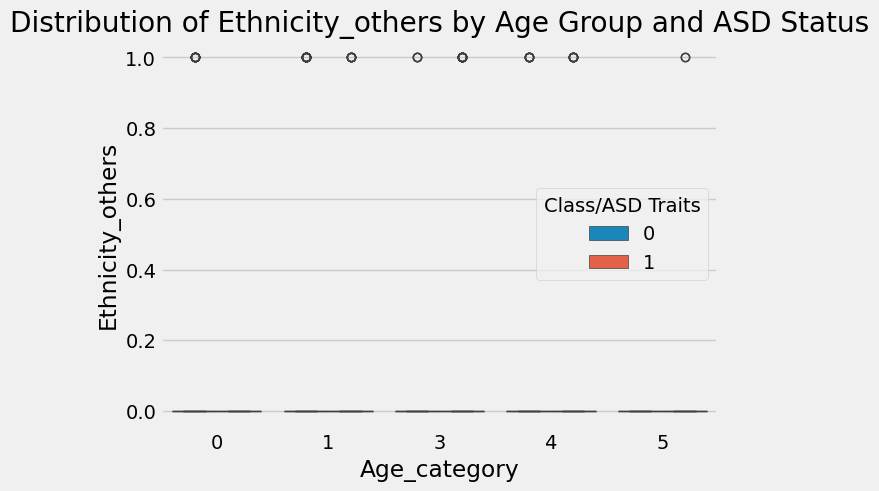

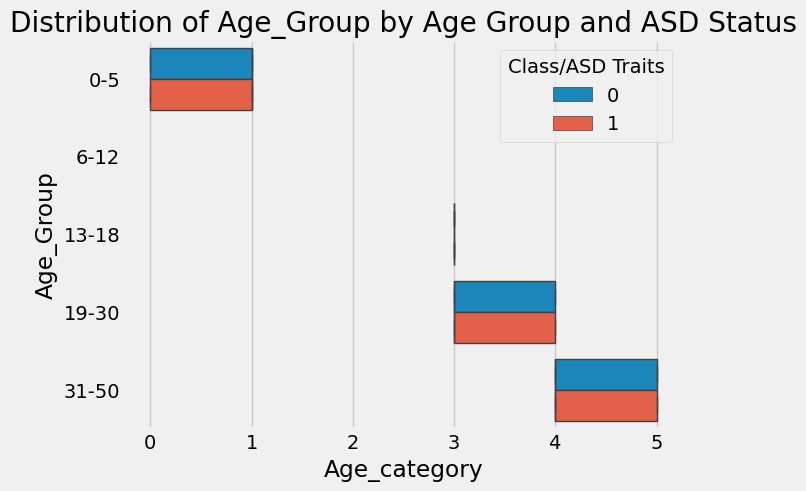

In [310]:
import pandas as pd
#data_encoded2 = pd.read_csv('ASD.csv')
for feature in data_encoded2.columns:
    if feature != 'Age_category' and feature != 'Class/ASD Traits':
        sns.boxplot(x='Age_category', y=feature, hue='Class/ASD Traits', data=data_encoded2)
        plt.title(f'Distribution of {feature} by Age Group and ASD Status')
        plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\A'
<>:6: SyntaxWarning: invalid escape sequence '\A'
C:\Users\pc\AppData\Local\Temp\ipykernel_2452\784488336.py:6: SyntaxWarning: invalid escape sequence '\A'
  data = pd.read_csv('c:\Autism\ASD.csv')


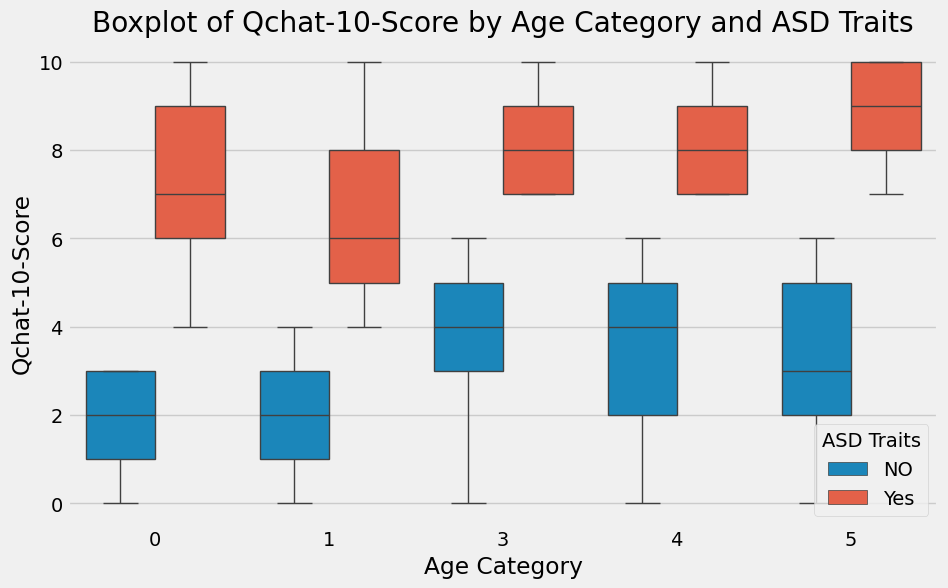

In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# تحميل البيانات من الملف
data = pd.read_csv('c:\Autism\ASD.csv')

# تحويل العمود 'Qchat-10-Score' إلى نوع بيانات عدد صحيح
data['Qchat-10-Score'] = data['Qchat-10-Score'].astype(int)

# رسم boxplot لكل فئة عمرية
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_category', y='Qchat-10-Score', data=data, hue='Class/ASD Traits')
plt.title('Boxplot of Qchat-10-Score by Age Category and ASD Traits')
plt.xlabel('Age Category')
plt.ylabel('Qchat-10-Score')
plt.legend(title='ASD Traits')
plt.show()